# Global AI Python Aygaz Data Analysis Bootcamp - New York City AirBnb Project

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype    # importing libraries

In [2]:
sns.set(rc={'figure.figsize':(6, 4)})

In [3]:
df = pd.read_csv('AB_NYC_2019.csv')     # read csv file - loading data set
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [4]:
df.tail()

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

In [5]:
df.shape

(48895, 16)

In [6]:
df.size

782320

In [7]:
df.columns   

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
df.info()    # getting information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
df.describe().T  # get statistics insight about the data

count          mean           std  \
id                              48895.0  1.901714e+07  1.098311e+07   
host_id                         48895.0  6.762001e+07  7.861097e+07   
latitude                        48895.0  4.072895e+01  5.453008e-02   
longitude                       48895.0 -7.395217e+01  4.615674e-02   
price                           48895.0  1.527207e+02  2.401542e+02   
minimum_nights                  48895.0  7.029962e+00  2.051055e+01   
number_of_reviews               48895.0  2.327447e+01  4.455058e+01   
reviews_per_month               38843.0  1.373221e+00  1.680442e+00   
calculated_host_listings_count  48895.0  7.143982e+00  3.295252e+01   
availability_365                48895.0  1.127813e+02  1.316223e+02   

                                       min           25%           50%  \
id                              2539.00000  9.471945e+06  1.967728e+07   
host_id                         2438.00000  7.822033e+06  3.079382e+07   
latitude                          40.49979  4.069010e+01  4.072307e+01   
longitude                        -74.24442 -7.398307e+01 -7.395568e+01   
price                              0.00000  6.900000e+01  1.060000e+02   
minimum_nights                     1.00000  1.000000e+00  3.000000e+00   
number_of_reviews                  0.00000  1.000000e+00  5.000000e+00   
reviews_per_month                  0.01000  1.900000e-01  7.200000e-01   
calculated_host_listings_count     1.00000  1.000000e+00  1.000000e+00   
availability_365                   0.00000  0.000000e+00  4.500000e+01   

                                         75%           max  
id                              2.915218e+07  3.648724e+07  
host_id                         1.074344e+08  2.743213e+08  
latitude                        4.076311e+01  4.091306e+01  
longitude                      -7.393627e+01 -7.371299e+01  
price                           1.750000e+02  1.000000e+04  
minimum_nights                  5.000000e+00  1.250000e+03  
number_of_reviews               2.400000e+01  6.290000e+02  
reviews_per_month               2.020000e+00  5.850000e+01  
calculated_host_listings_count  2.000000e+00  3.270000e+02  
availability_365                2.270000e+02  3.650000e+02

In [10]:
from os import mkdir

In [11]:
try:
  mkdir("Plots")
except:
  pass

mypaths="Plots"

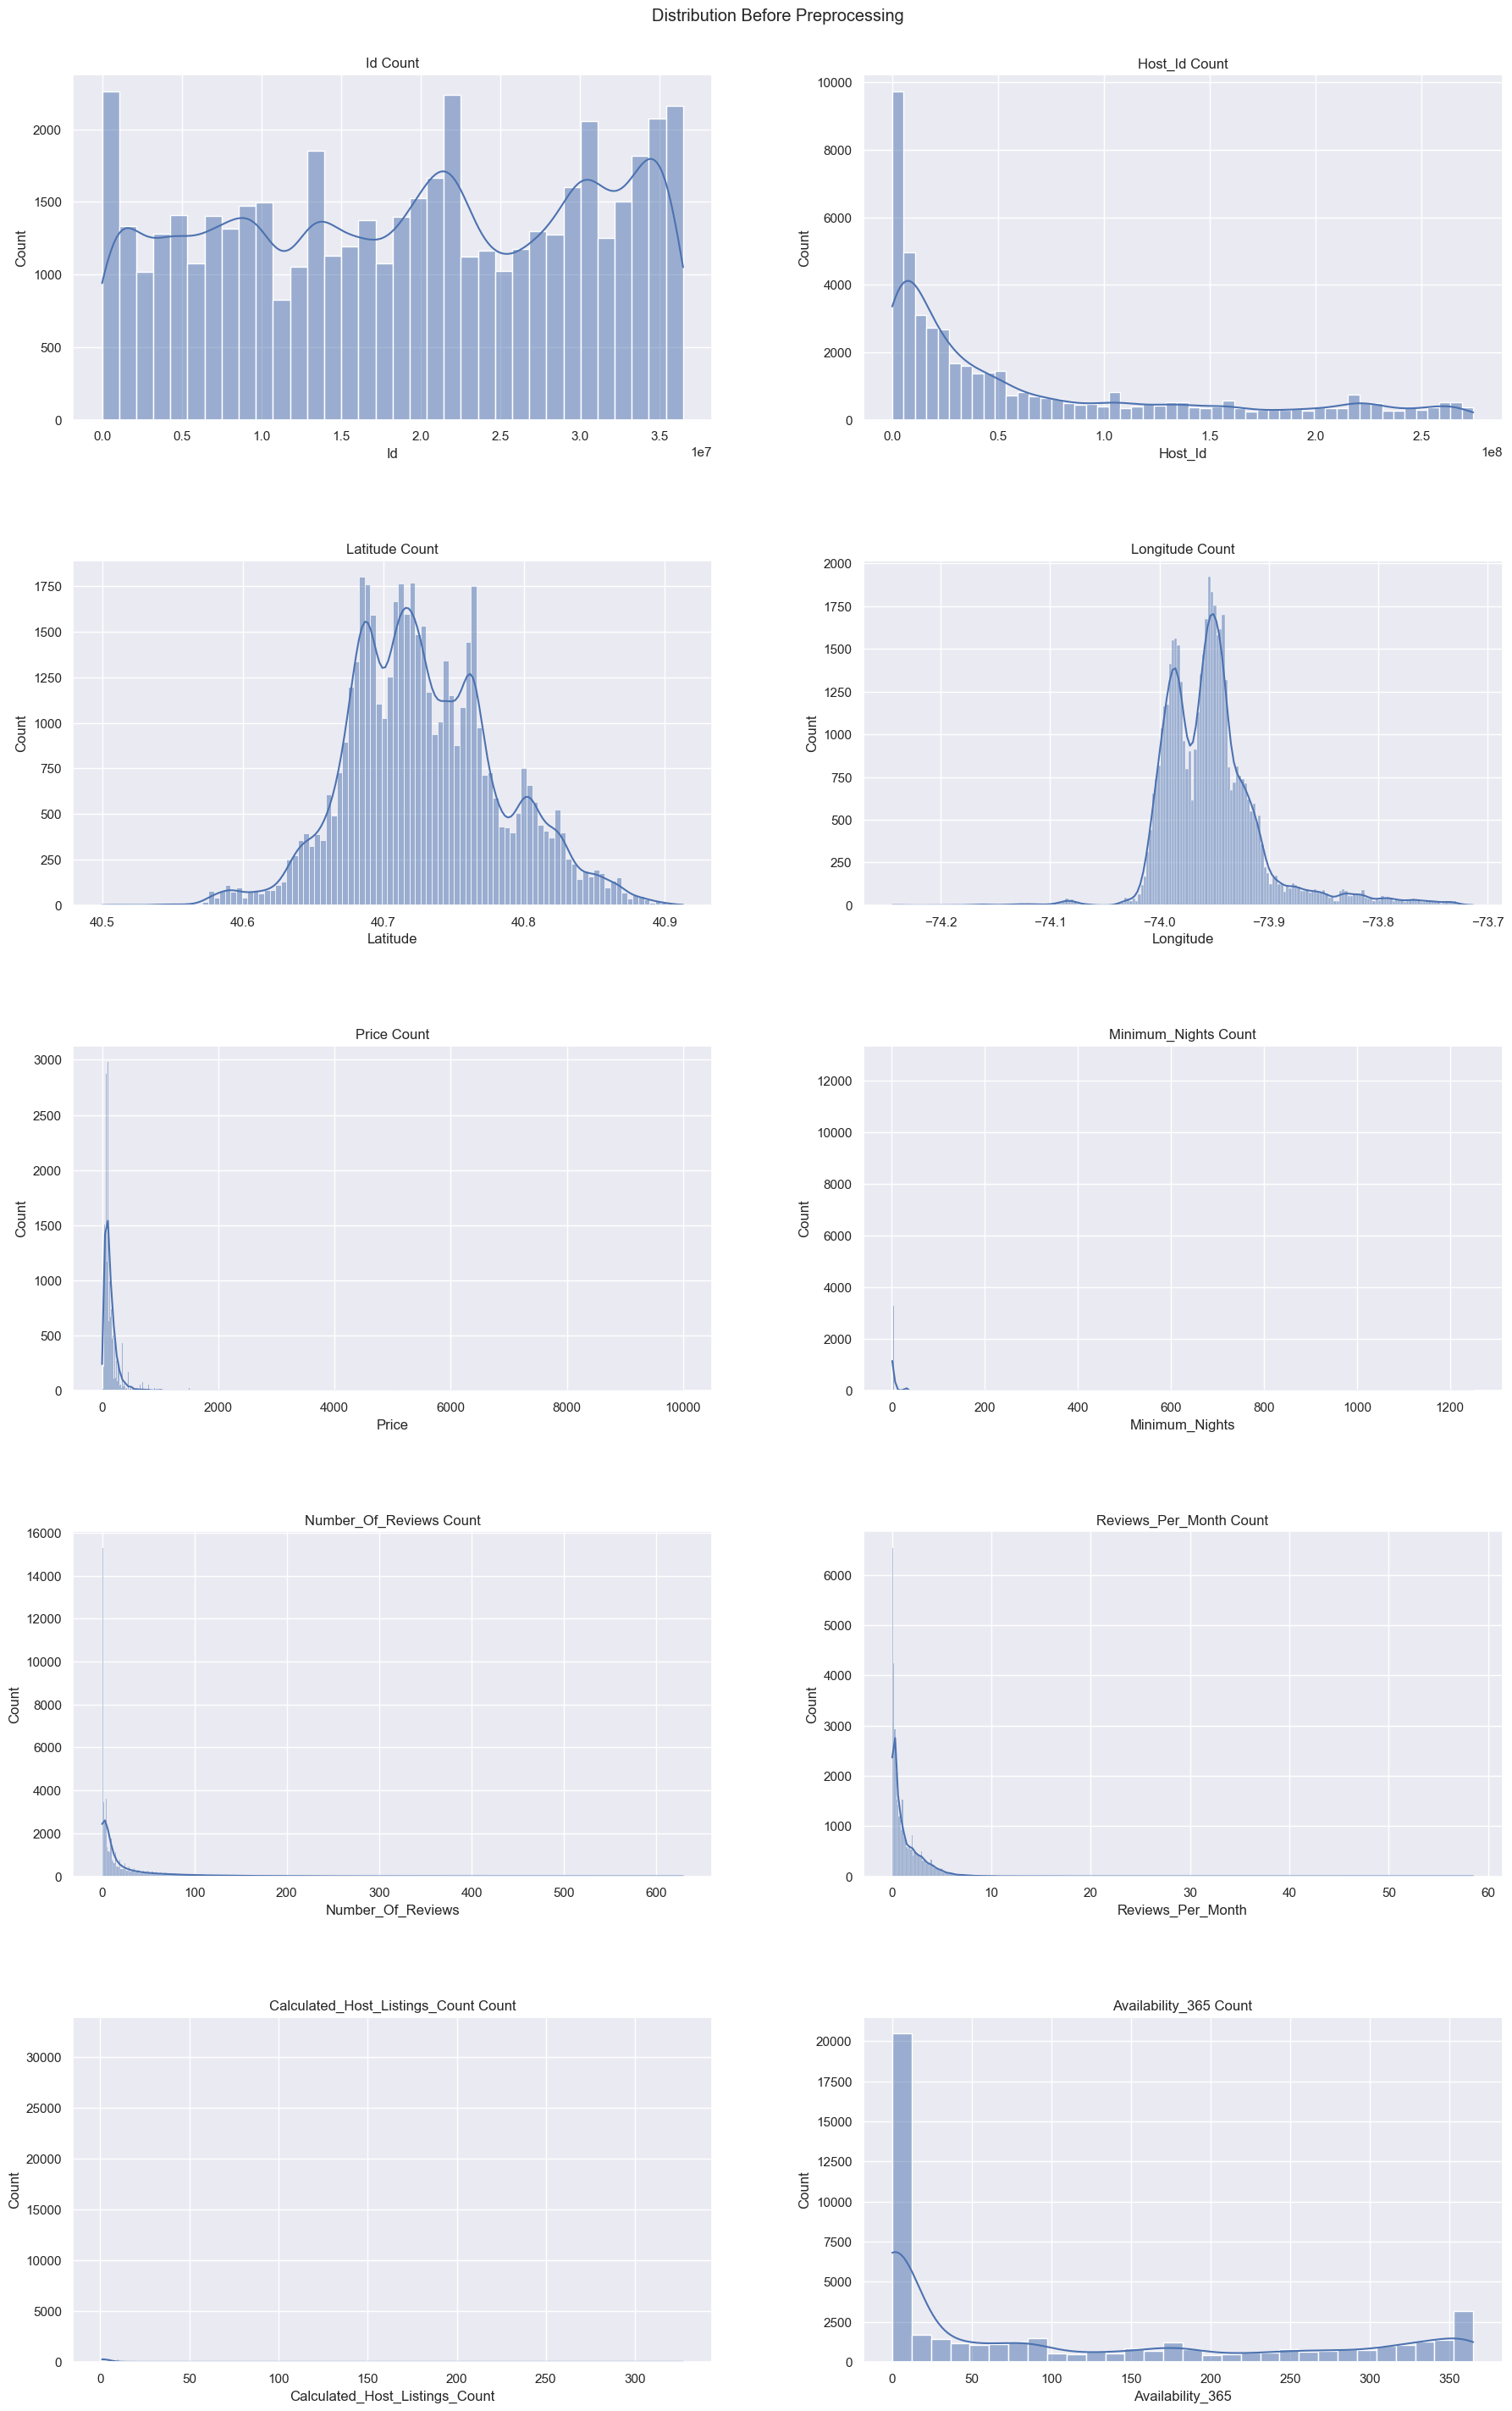

In [12]:
f, axes = plt.subplots(5, 2, figsize = (20, 30))
f.tight_layout(pad=8)
f.suptitle("Distribution Before Preprocessing")
cols = df.select_dtypes(exclude="object").columns

x_axis = 0
y_axis = 0

for col in cols:
  sns.histplot(data=df, x=col, kde=True, ax=axes[x_axis, y_axis])
  axes[x_axis,y_axis].set_xlabel(col.title())
  axes[x_axis,y_axis].set_ylabel("Count")
  axes[x_axis,y_axis].set_title(f"{col.title()} Count")

  if y_axis == 1:
    y_axis = 0
    x_axis += 1
    # continue
  else:
    y_axis += 1

plt.savefig("Plots/histograms.png")
plt.show()

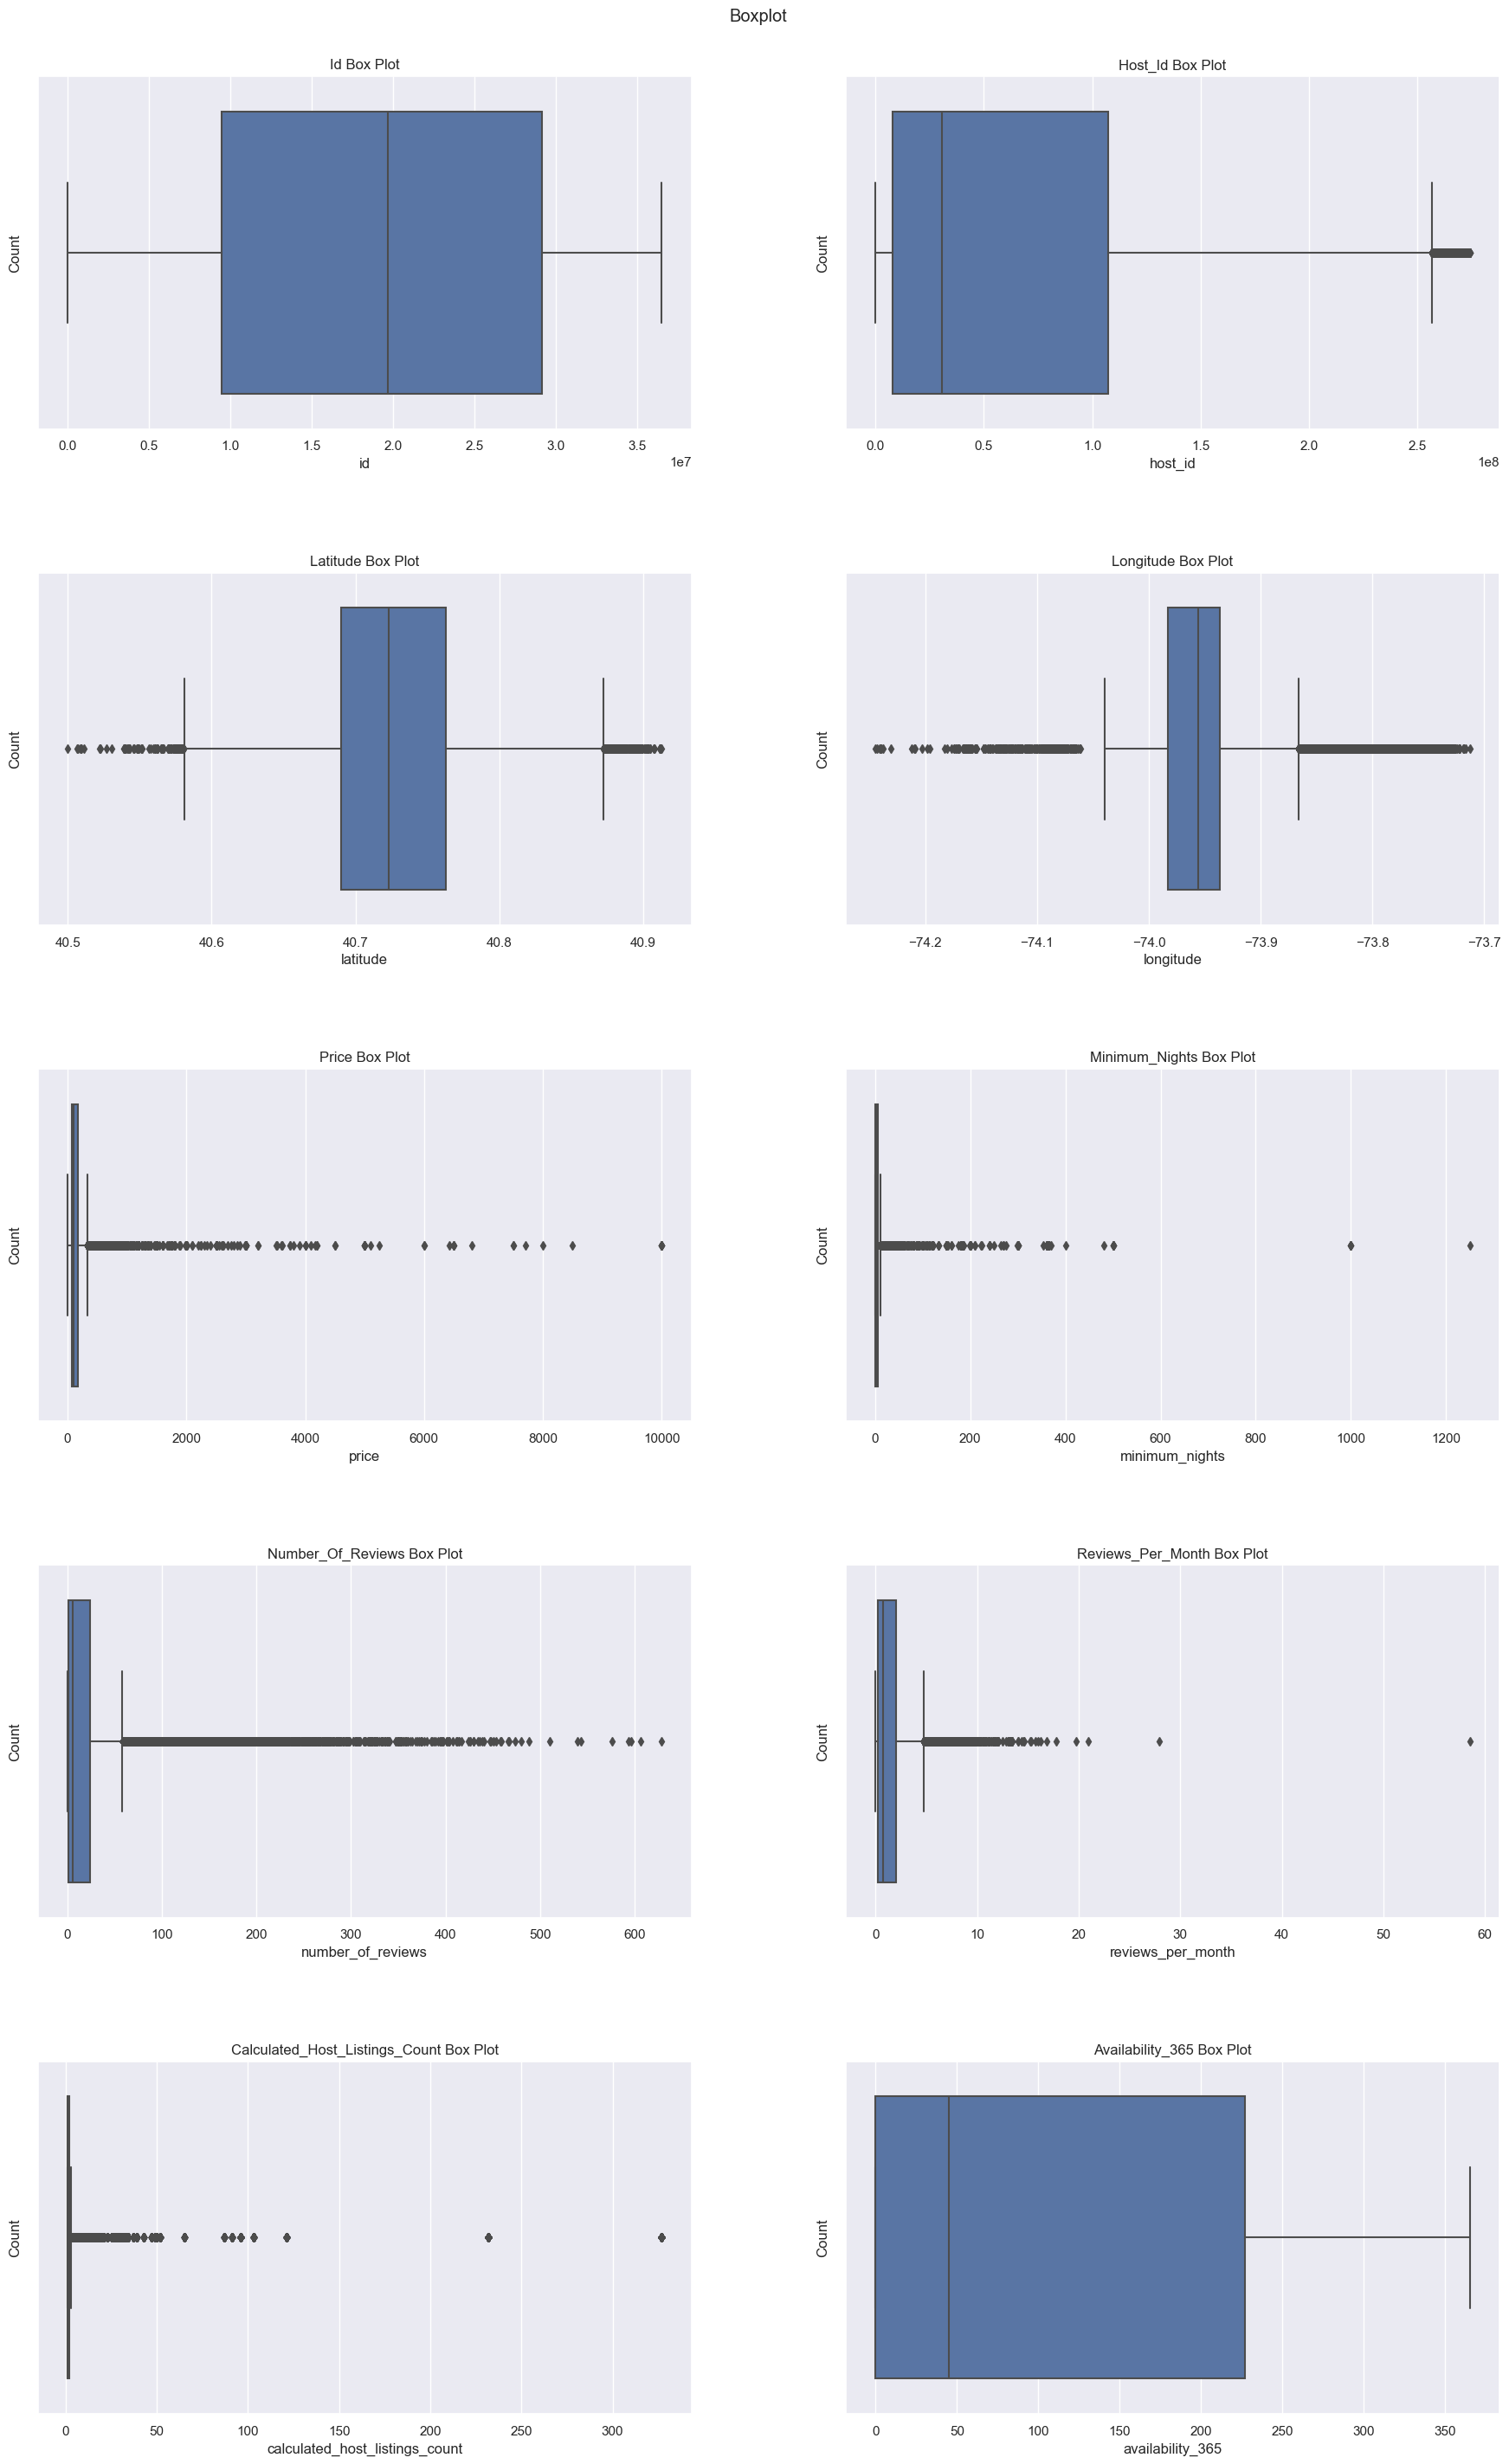

In [13]:
f, axes = plt.subplots(5, 2, figsize = (20, 30))
f.tight_layout(pad=8)
f.suptitle("Boxplot")
cols = df.select_dtypes(exclude=["object","category"]).columns

x_axis = 0
y_axis = 0

for col in cols:
  sns.boxplot(data=df, x=col, ax=axes[x_axis, y_axis])
  axes[x_axis,y_axis].set_xlabel(col)
  axes[x_axis,y_axis].set_ylabel("Count")
  axes[x_axis,y_axis].set_title(f"{col.title()} Box Plot")

  if y_axis == 1:
    y_axis = 0
    x_axis += 1
    # continue
  else:
    y_axis += 1

plt.savefig("Plots/boxplots.png")
plt.show()

In [14]:
df.drop(["name", "id", "host_id", "host_name"], inplace=True, axis=1)
df.head()

neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   
2    150               3                  0         NaN                NaN   
3     89               1                270  2019-07-05               4.64   
4     80              10                  9  2018-11-19               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

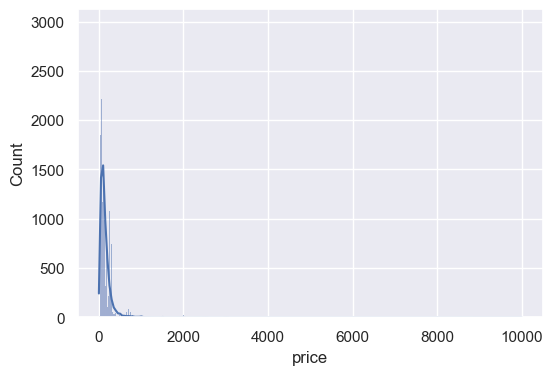

In [15]:
sns.histplot(df["price"], kde=True)
plt.savefig("Plots/histplotKDE1.png")
plt.show()

In [16]:
floats = ["price", "reviews_per_month", "calculated_host_listings_count", "latitude", "longitude"]

for column in floats:
  df[column] = pd.to_numeric(df[column], errors="coerce")

  max_value = (3*df[column].std()) + df[column].mean()  # finds the max value that is not going to be called not an outlier
  min_value = -((3*df[column].std()) + df[column].mean())  # finds the min value that is not going to be called not an outlier

  mean = df.loc[(df[column] > min_value) & (df[column] < max_value), column].mean()  # calculate the new mean of the column without the outlier values

  # if there is no outlier value then the mean will be np.nan in this situation don't need to do imputation
  if mean is not np.nan:
    df.loc[(df[column] < min_value) | (df[column] > max_value), column] = mean  # change outlier values with mean
    df[column].fillna(mean, inplace=True)  # also fill nan values with mean
  else:  # this condition means there is no outlier value in the column
    df[column].fillna(df[column].mean(), inplace=True)  # filling NA values with mean

  df[column] = df[column].astype("float64") #converting the type to int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  float64
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     38843 non-null  object 
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  float64
 11  availability_365                48895 non-null  int64  
dtypes: float64(5), int64(3), object(

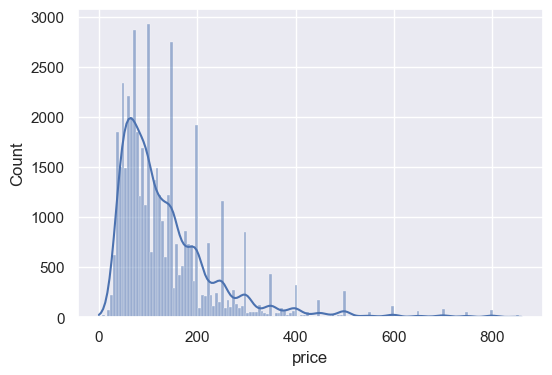

In [18]:
sns.histplot(df["price"], kde=True)
plt.savefig("Plots/histplotKDE2.png")
plt.show()

In [19]:
df.duplicated().sum()    # checking duplicated values

0

In [20]:
df.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [21]:
df.loc[df.isna()["last_review"], "last_review"] = "unknown_date"

In [22]:
df.isna().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  float64
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     48895 non-null  object 
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  float64
 11  availability_365                48895 non-null  int64  
dtypes: float64(5), int64(3), object(

In [24]:
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category')
df['neighbourhood'] = df['neighbourhood'].astype('category')
df['room_type'] = df['room_type'].astype('category')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   neighbourhood_group             48895 non-null  category
 1   neighbourhood                   48895 non-null  category
 2   latitude                        48895 non-null  float64 
 3   longitude                       48895 non-null  float64 
 4   room_type                       48895 non-null  category
 5   price                           48895 non-null  float64 
 6   minimum_nights                  48895 non-null  int64   
 7   number_of_reviews               48895 non-null  int64   
 8   last_review                     48895 non-null  object  
 9   reviews_per_month               48895 non-null  float64 
 10  calculated_host_listings_count  48895 non-null  float64 
 11  availability_365                48895 non-null  int64   
dtypes: category(3), fl

In [26]:
df.describe().T

count        mean         std       min  \
latitude                        48895.0   40.728754    0.054225  40.49979   
longitude                       48895.0  -73.952170    0.046157 -74.24442   
price                           48895.0  138.746903  107.130617   0.00000   
minimum_nights                  48895.0    7.029962   20.510550   1.00000   
number_of_reviews               48895.0   23.274466   44.550582   0.00000   
reviews_per_month               48895.0    1.262148    1.232741   0.01000   
calculated_host_listings_count  48895.0    3.606990   10.831277   1.00000   
availability_365                48895.0  112.781327  131.622289   0.00000   

                                     25%        50%         75%         max  
latitude                        40.69010   40.72307   40.762995    40.89245  
longitude                      -73.98307  -73.95568  -73.936275   -73.71299  
price                           69.00000  106.00000  175.000000   860.00000  
minimum_nights                   1.00000    3.00000    5.000000  1250.00000  
number_of_reviews                1.00000    5.00000   24.000000   629.00000  
reviews_per_month                0.28000    1.22000    1.480000     6.41000  
calculated_host_listings_count   1.00000    1.00000    2.000000   103.00000  
availability_365                 0.00000   45.00000  227.000000   365.00000

# Dealing With Wrong Price Values

In [27]:
df[df['price']==0]

neighbourhood_group       neighbourhood  latitude  longitude  \
23161            Brooklyn  Bedford-Stuyvesant  40.69023  -73.95428   
25433               Bronx     East Morrisania  40.83296  -73.88668   
25634            Brooklyn            Bushwick  40.69467  -73.92433   
25753            Brooklyn          Greenpoint  40.72462  -73.94072   
25778            Brooklyn        Williamsburg  40.70838  -73.94645   
25794            Brooklyn  Bedford-Stuyvesant  40.68173  -73.91342   
25795            Brooklyn  Bedford-Stuyvesant  40.68279  -73.91170   
25796            Brooklyn  Bedford-Stuyvesant  40.68258  -73.91284   
26259           Manhattan         Murray Hill  40.75091  -73.97597   
26841            Brooklyn            Bushwick  40.69211  -73.90670   
26866            Brooklyn            Bushwick  40.69166  -73.90928   

             room_type  price  minimum_nights  number_of_reviews  \
23161     Private room    0.0               4                  1   
25433     Private room    0.0               2                 55   
25634     Private room    0.0               2                 16   
25753     Private room    0.0               2                 12   
25778  Entire home/apt    0.0               5                  3   
25794     Private room    0.0               1                 93   
25795     Private room    0.0               1                 95   
25796     Private room    0.0               1                 95   
26259  Entire home/apt    0.0               3                  0   
26841      Shared room    0.0              30                  2   
26866      Shared room    0.0              30                  5   

        last_review  reviews_per_month  calculated_host_listings_count  \
23161    2018-01-06           0.050000                             4.0   
25433    2019-06-24           2.560000                             4.0   
25634    2019-05-18           0.710000                             5.0   
25753    2017-10-27           0.530000                             2.0   
25778    2018-01-02           0.150000                             1.0   
25794    2019-06-15           4.280000                             6.0   
25795    2019-06-21           4.370000                             6.0   
25796    2019-06-23           4.350000                             6.0   
26259  unknown_date           1.262148                             1.0   
26841    2019-06-22           0.110000                             6.0   
26866    2019-05-24           0.260000                             6.0   

       availability_365  
23161                28  
25433               127  
25634                 0  
25753                 0  
25778                73  
25794               176  
25795               232  
25796               222  
26259                 0  
26841               333  
26866               139

In [28]:
df[df['price']==0].shape

(11, 12)

In [29]:
# I drop 'price'==0 values
df.drop(df[df['price']==0].index, inplace = True)

In [30]:
df.shape

(48884, 12)

# Dealing With Wrong availability_365 Values

In [31]:
df.availability_365.nunique()    

366

In [32]:
df[df['availability_365']==0].shape   # availability_365 has 0 value so I will drop these rows

(17530, 12)

In [33]:
# I drop 'availability_365'==0 values
df.drop(df[df['availability_365']==0].index, inplace = True)

In [34]:
df.shape

(31354, 12)

#  Dealing With Wrong minimum_nights Values


In [35]:
df[df['minimum_nights']>365].shape

(14, 12)

In [36]:
# I drop 'minimum_nights'>365 values
df.drop(df[df['minimum_nights']>365].index, inplace = True)

In [37]:
df.shape

(31340, 12)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31340 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   neighbourhood_group             31340 non-null  category
 1   neighbourhood                   31340 non-null  category
 2   latitude                        31340 non-null  float64 
 3   longitude                       31340 non-null  float64 
 4   room_type                       31340 non-null  category
 5   price                           31340 non-null  float64 
 6   minimum_nights                  31340 non-null  int64   
 7   number_of_reviews               31340 non-null  int64   
 8   last_review                     31340 non-null  object  
 9   reviews_per_month               31340 non-null  float64 
 10  calculated_host_listings_count  31340 non-null  float64 
 11  availability_365                31340 non-null  int64   
dtypes: category(3), fl

# Heat Map 

C:\Users\sony\AppData\Local\Temp\ipykernel_13792\3004545781.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True , linewidths = 0.2, cmap = 'Greens')


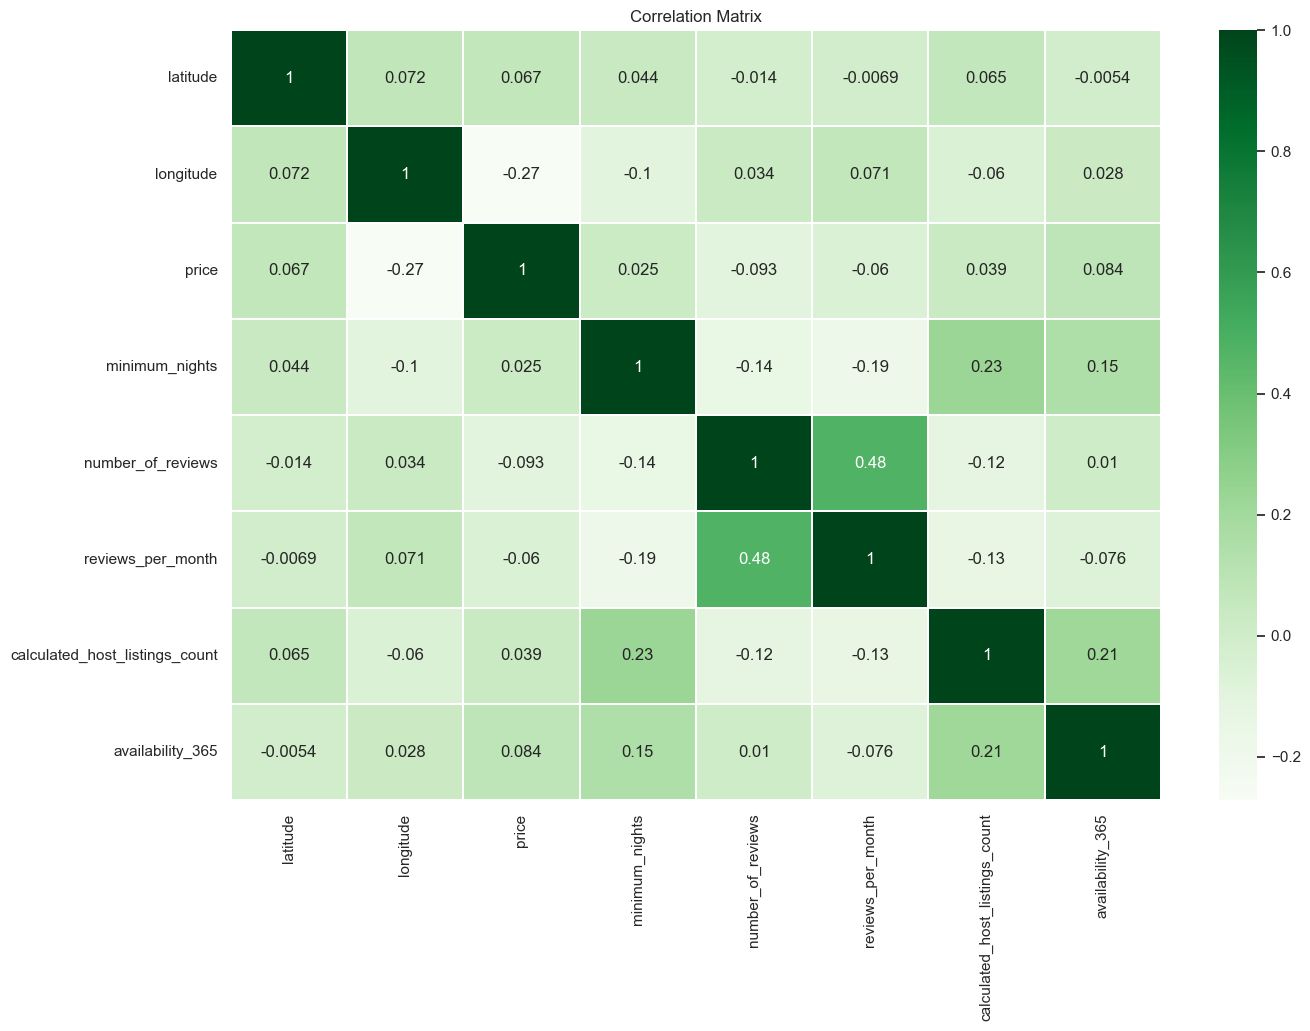

In [39]:
sns.set(rc={"figure.figsize":(15,10)})
plt.title("Correlation Matrix")
sns.heatmap(df.corr(), annot=True , linewidths = 0.2, cmap = 'Greens')
plt.savefig("Plots/correlation.png")

In [40]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

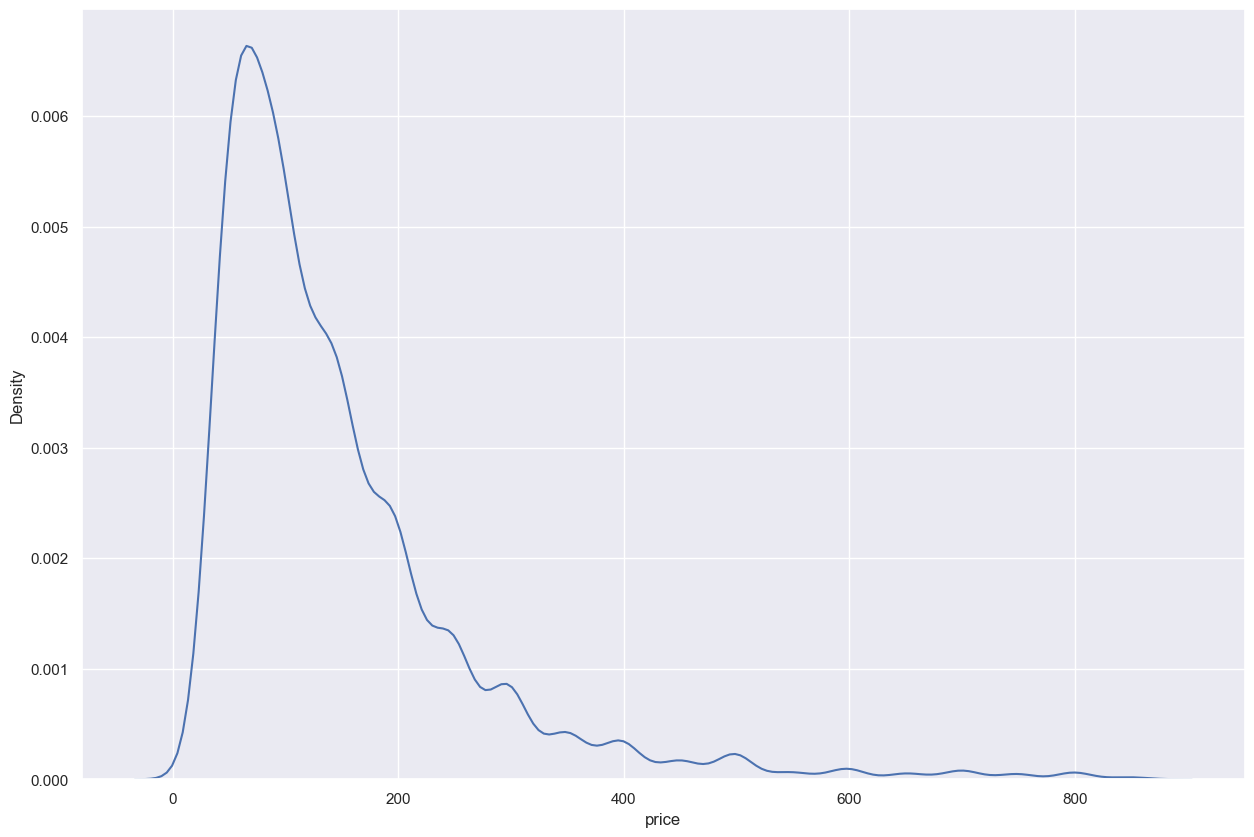

In [41]:
sns.kdeplot(df["price"])
plt.savefig("Plots/kdeplot_price.png")
plt.show()

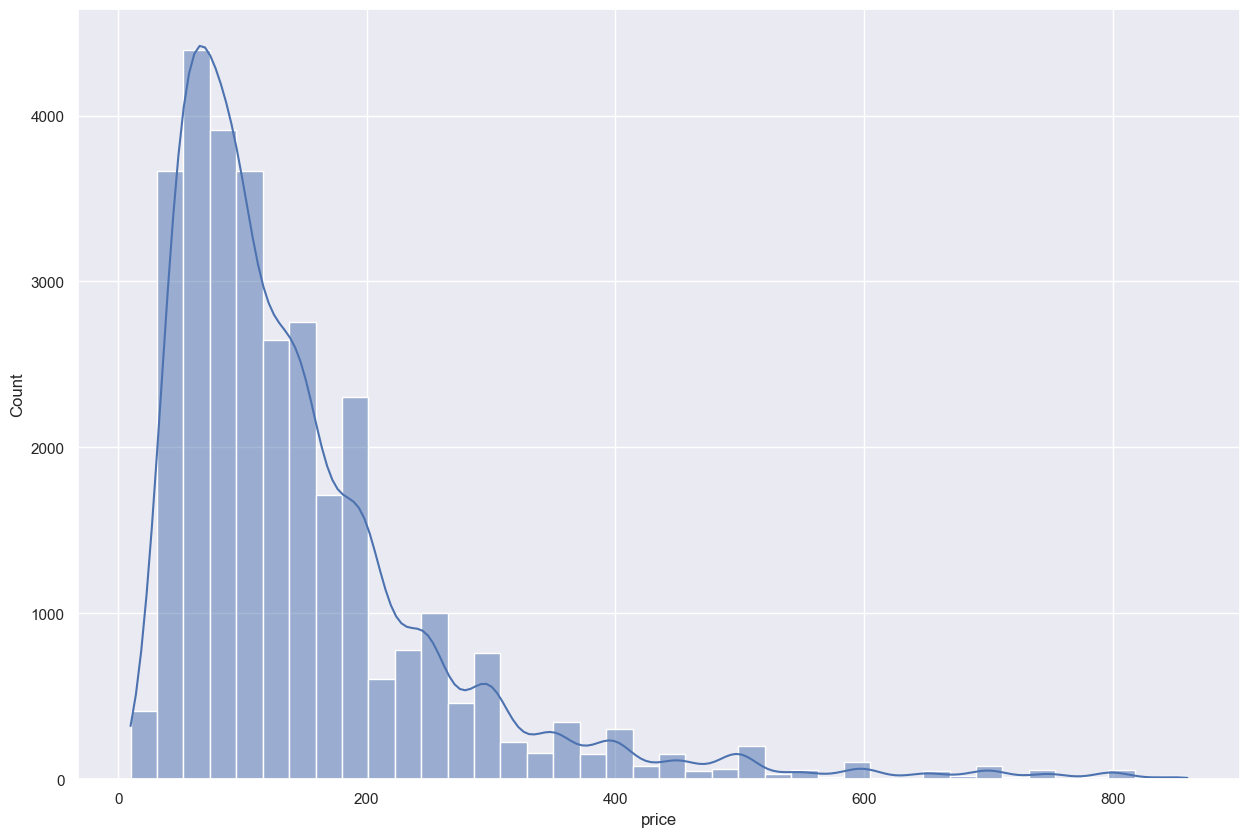

In [42]:
sns.histplot(df["price"], kde=True, bins=40)
plt.savefig("Plots/kdeplot_price_bins40.png")
plt.show()

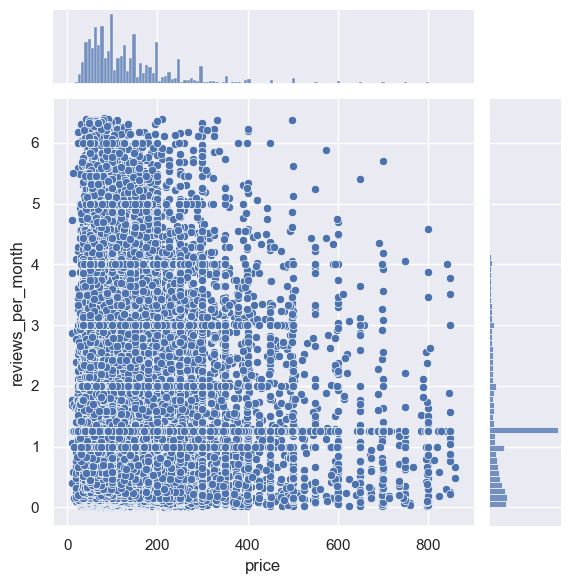

In [43]:
sns.jointplot(x="price", y=df["reviews_per_month"], data=df)
plt.savefig("Plots/jointplot_price_reviews_per_month.png")
plt.show()

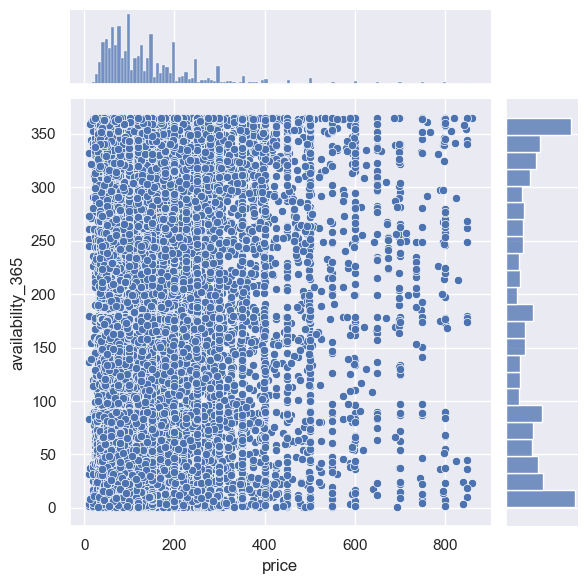

In [44]:
sns.jointplot(x="price", y=df["availability_365"], data=df)
plt.savefig("Plots/jointplot_price_availability_365.png")
plt.show()

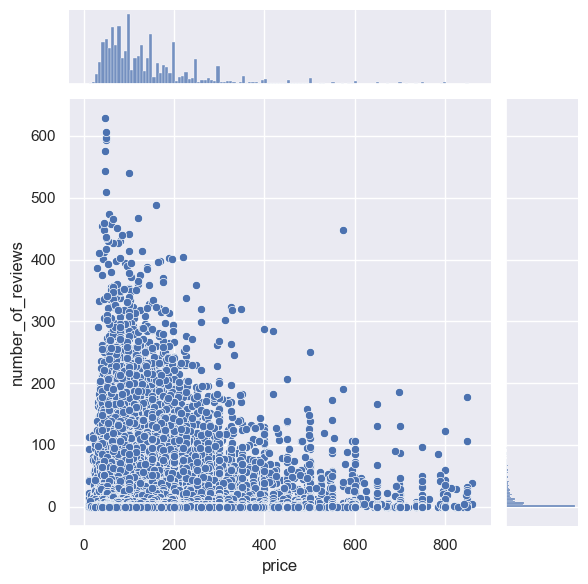

In [45]:
sns.jointplot(x="price", y=df["number_of_reviews"], data=df)
plt.savefig("Plots/jointplot_price_number_of_reviews.png")
plt.show()

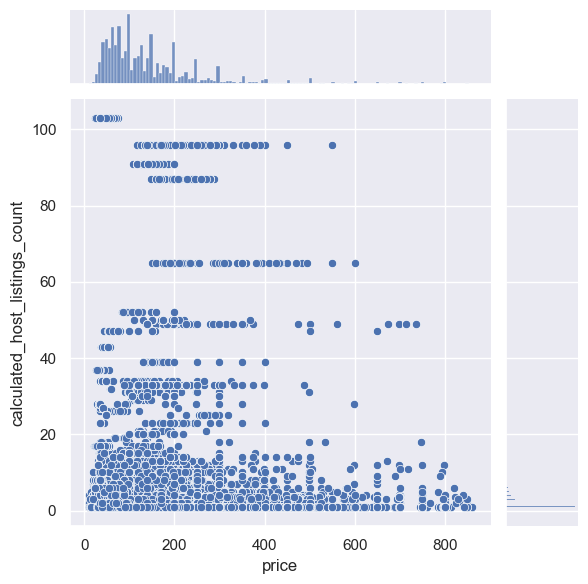

In [46]:
sns.jointplot(x="price", y=df["calculated_host_listings_count"], data=df)
plt.savefig("Plots/jointplot_price_calculated_host_listings_count.png")
plt.show()

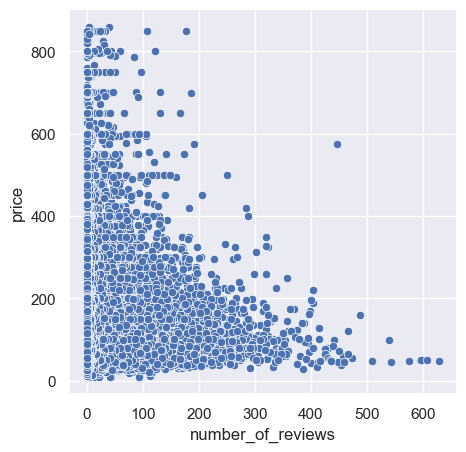

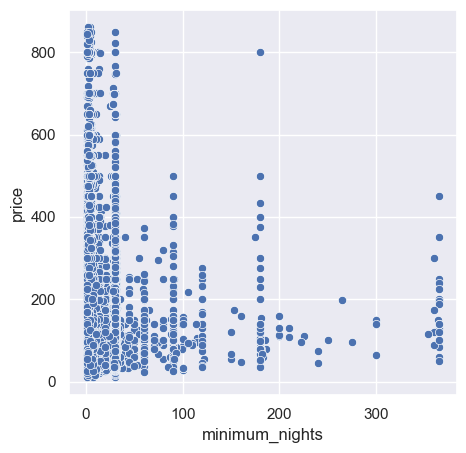

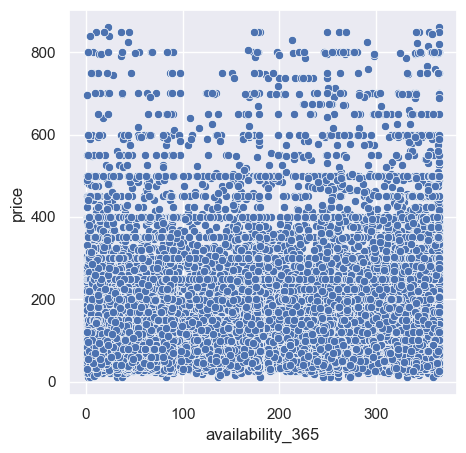

In [47]:
cols_2 = ["number_of_reviews", "minimum_nights", "availability_365"]

for col in cols_2:
  plt.figure(figsize=(5,5))
  sns.scatterplot(x=col, y="price", data=df)

plt.savefig("Plots/scatterplot_price_cols_2.png")
plt.show()

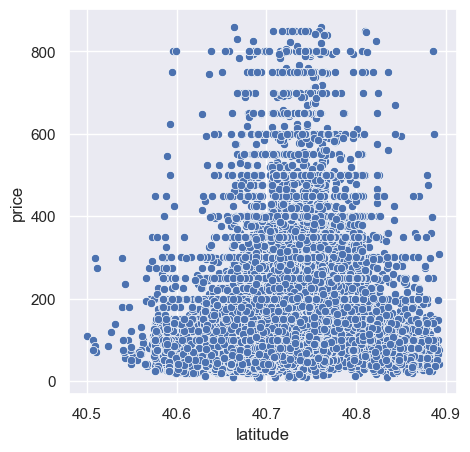

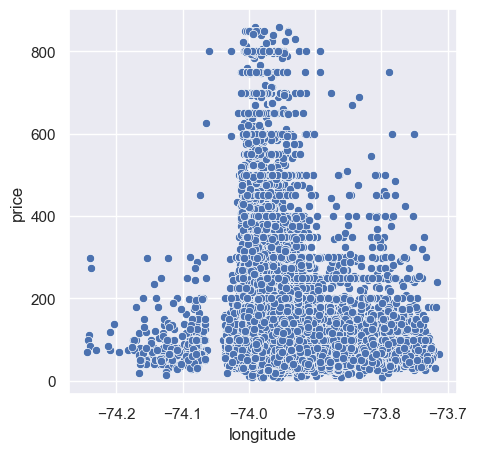

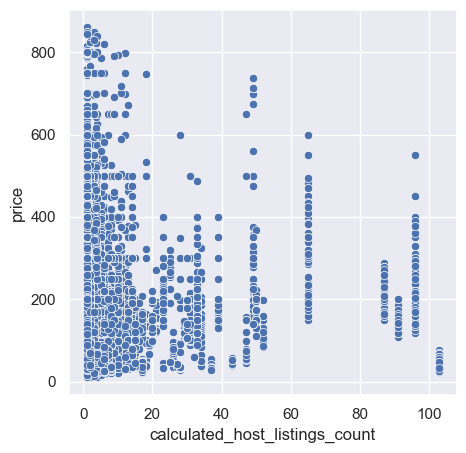

In [48]:
cols_3 = ["latitude", "longitude", "calculated_host_listings_count"]

for col in cols_3:
  plt.figure(figsize=(5,5))
  sns.scatterplot(x=col, y="price", data=df)

plt.savefig("Plots/scatterplot_price_cols_3.png")
plt.show()    

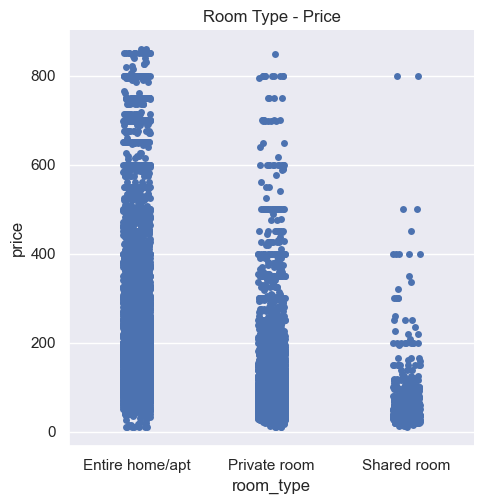

In [49]:
sns.catplot(x="room_type", y="price", data=df)
plt.title("Room Type - Price")

plt.savefig("Plots/catplot_room_type_price.png")
plt.show()

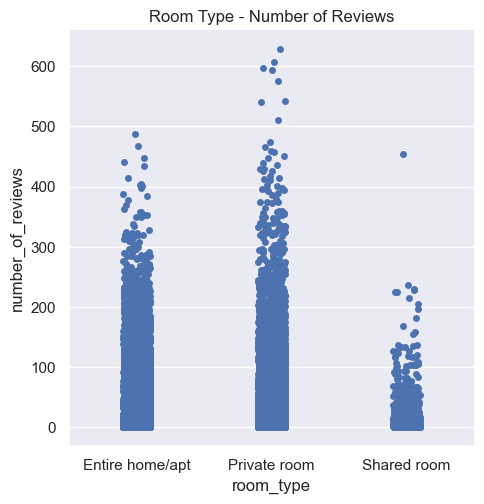

In [50]:
sns.catplot(x="room_type", y="number_of_reviews", data=df)
plt.title("Room Type - Number of Reviews")
plt.savefig("Plots/catplot_room_type_number_of_reviews.png")
plt.show()

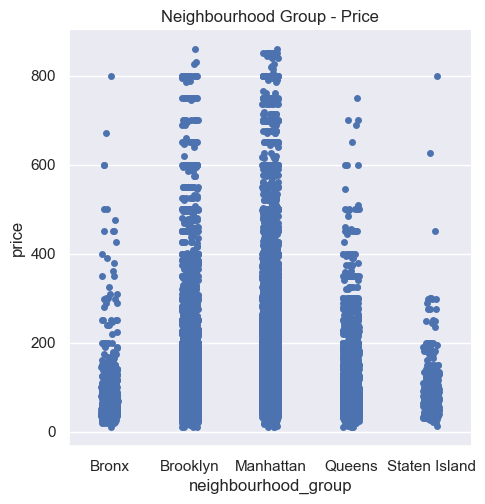

In [51]:
sns.catplot(x="neighbourhood_group", y="price", data=df)
plt.title("Neighbourhood Group - Price")
plt.savefig("Plots/catplot_neighbourhood_group_price.png")
plt.show()

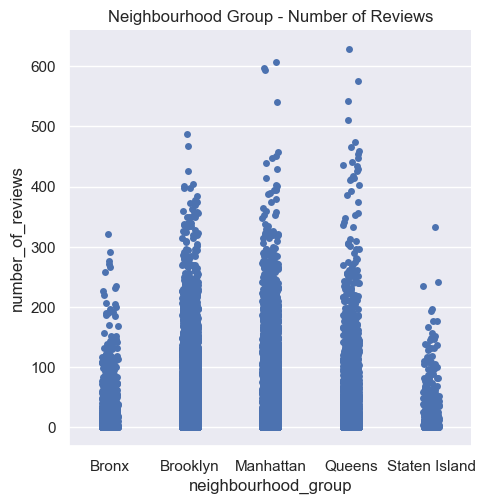

In [52]:
sns.catplot(x="neighbourhood_group", y="number_of_reviews", data=df)
plt.title("Neighbourhood Group - Number of Reviews")
plt.savefig("Plots/catplot_neighbourhood_group_number_of_reviews.png")
plt.show()

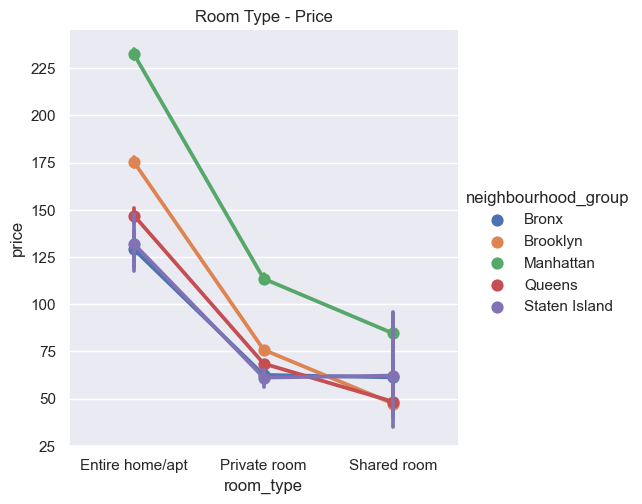

In [53]:
sns.catplot(x="room_type", y="price", hue="neighbourhood_group", kind="point", data=df)
plt.title("Room Type - Price")
plt.savefig("Plots/catplot_room_type_price_neighbourhood_group.png")
plt.show()

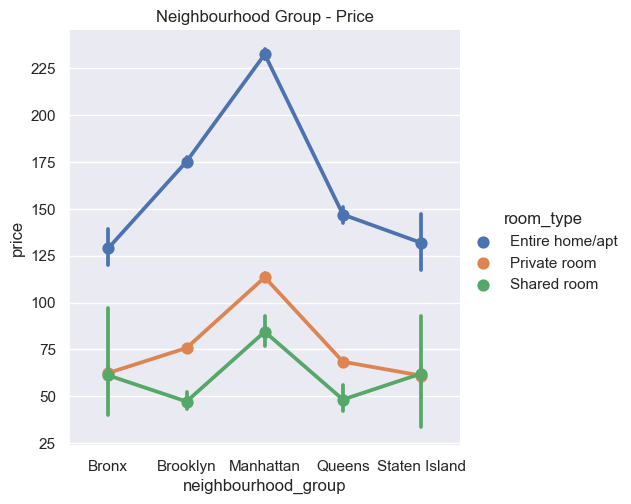

In [54]:
sns.catplot(x="neighbourhood_group", y="price", hue="room_type", kind="point", data=df)
plt.title("Neighbourhood Group - Price")
plt.savefig("Plots/catplot_neighbourhood_price_group_room_type.png")
plt.show()

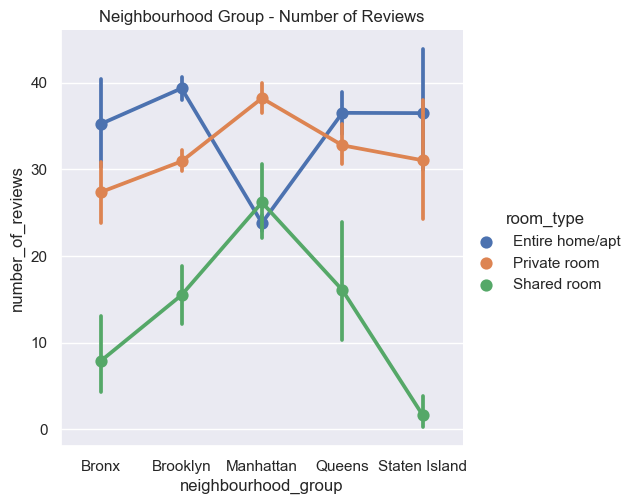

In [55]:
sns.catplot(x="neighbourhood_group", y="number_of_reviews", hue="room_type", kind="point", data=df)
plt.title("Neighbourhood Group - Number of Reviews")
plt.savefig("Plots/catplot_neighbourhood_group_number_of_reviews.png")
plt.show()

C:\Users\sony\AppData\Local\Temp\ipykernel_13792\3161866300.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["price"], shade=True)


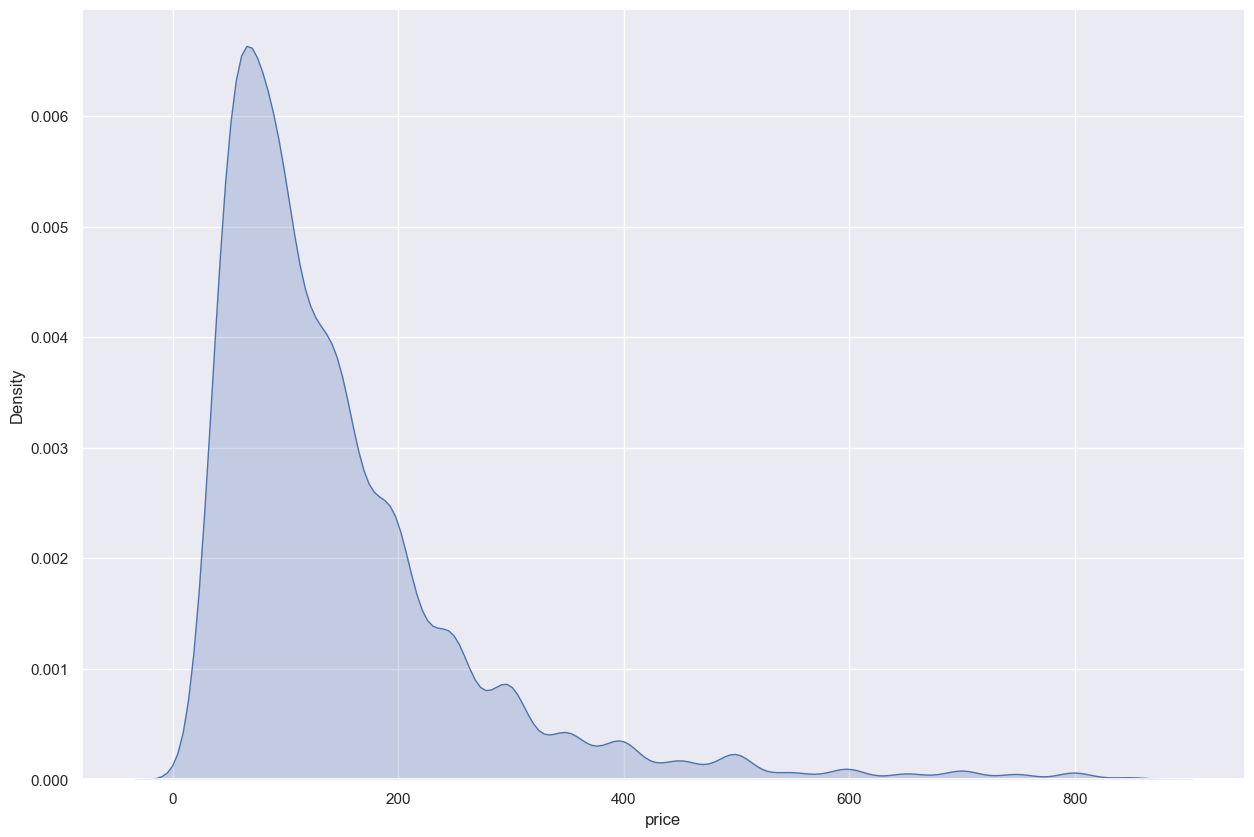

In [56]:
sns.kdeplot(df["price"], shade=True)
plt.savefig("Plots/kdeplot_price_shade.png")
plt.show()

C:\Users\sony\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\sony\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\sony\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


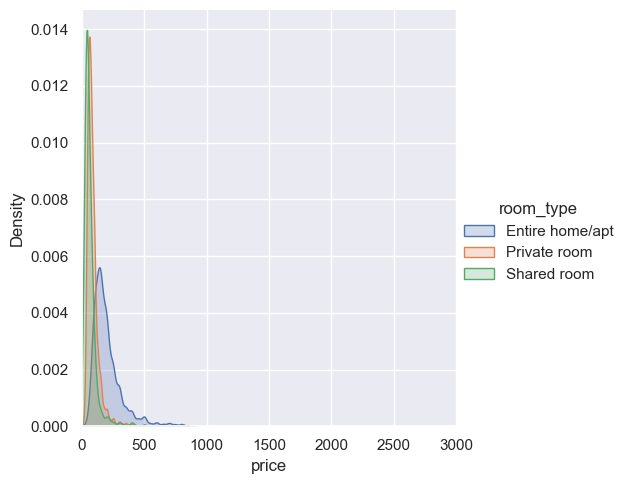

In [57]:
(sns.FacetGrid(df, hue="room_type", height=5, xlim=(0, 3000)).map(sns.kdeplot, "price", shade=True).add_legend())
plt.savefig("Plots/kdeplot_room_type_price_shade.png")
plt.show()

C:\Users\sony\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\sony\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\sony\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


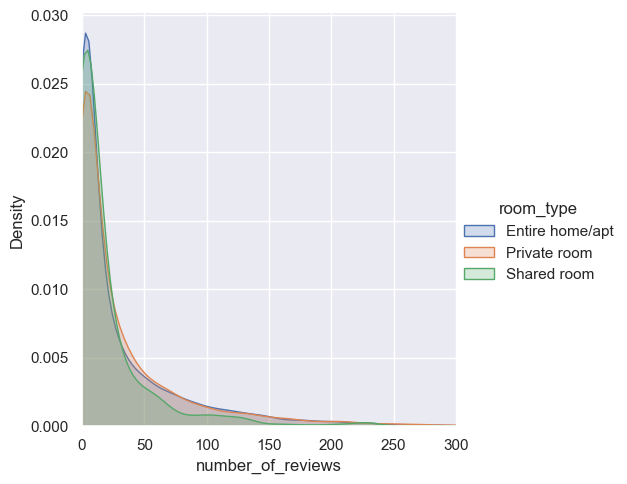

In [58]:
(sns.FacetGrid(df, hue="room_type", height=5, xlim=(0, 300)).map(sns.kdeplot, "number_of_reviews", shade=True).add_legend())
plt.savefig("Plots/kdeplot_room_type_number_of_reviews_shade.png")
plt.show()

C:\Users\sony\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\sony\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\sony\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\sony\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func

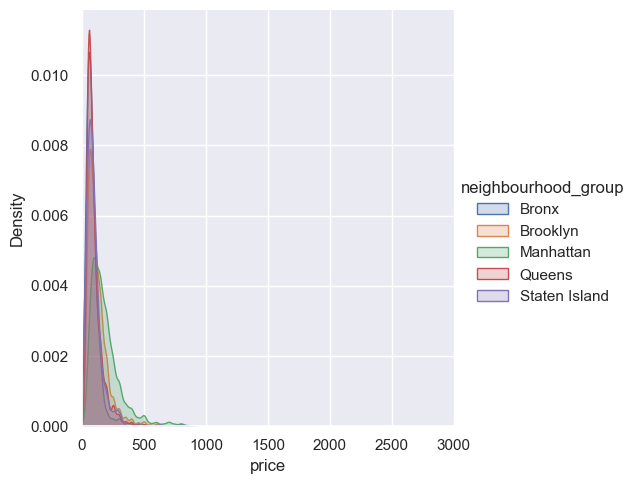

In [59]:
(sns.FacetGrid(df, hue="neighbourhood_group", height=5, xlim=(0, 3000)).map(sns.kdeplot, "price", shade=True).add_legend())
plt.savefig("Plots/kdeplot_neighbourhood_group_price_shade.png")
plt.show()

C:\Users\sony\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\sony\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\sony\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\sony\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func

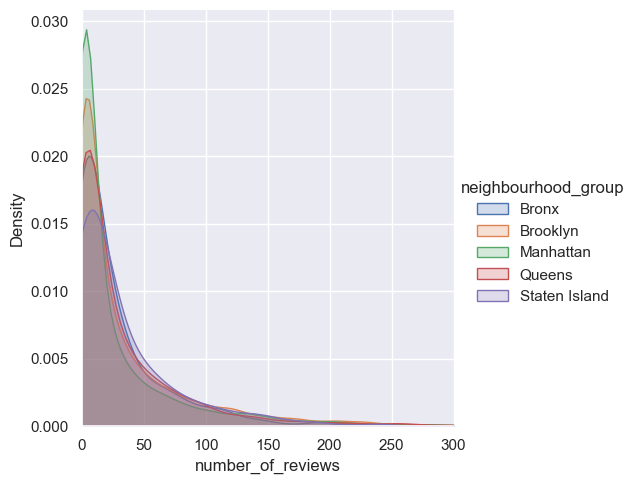

In [60]:
(sns.FacetGrid(df, hue="neighbourhood_group", height=5, xlim=(0, 300)).map(sns.kdeplot, "number_of_reviews", shade=True).add_legend())
plt.savefig("Plots/kdeplot_neighbourhood_group_number_of_reviews_shade.png")
plt.show()

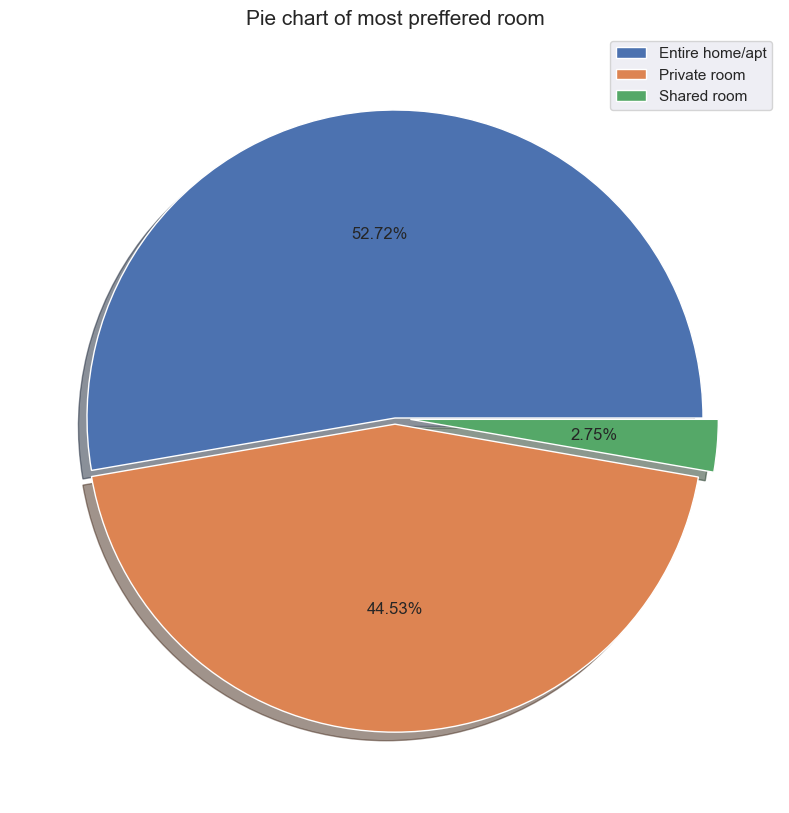

In [61]:
a = df['room_type'].value_counts()
plt.pie(a,explode = [0,0.02,0.05],autopct = '%.2f%%',shadow= True)

plt.legend(df['room_type'].value_counts().index,loc=0)

plt.title('Pie chart of most preffered room',fontsize = 15)
plt.savefig("Plots/pie_room_type_value_counts.png")
plt.show()

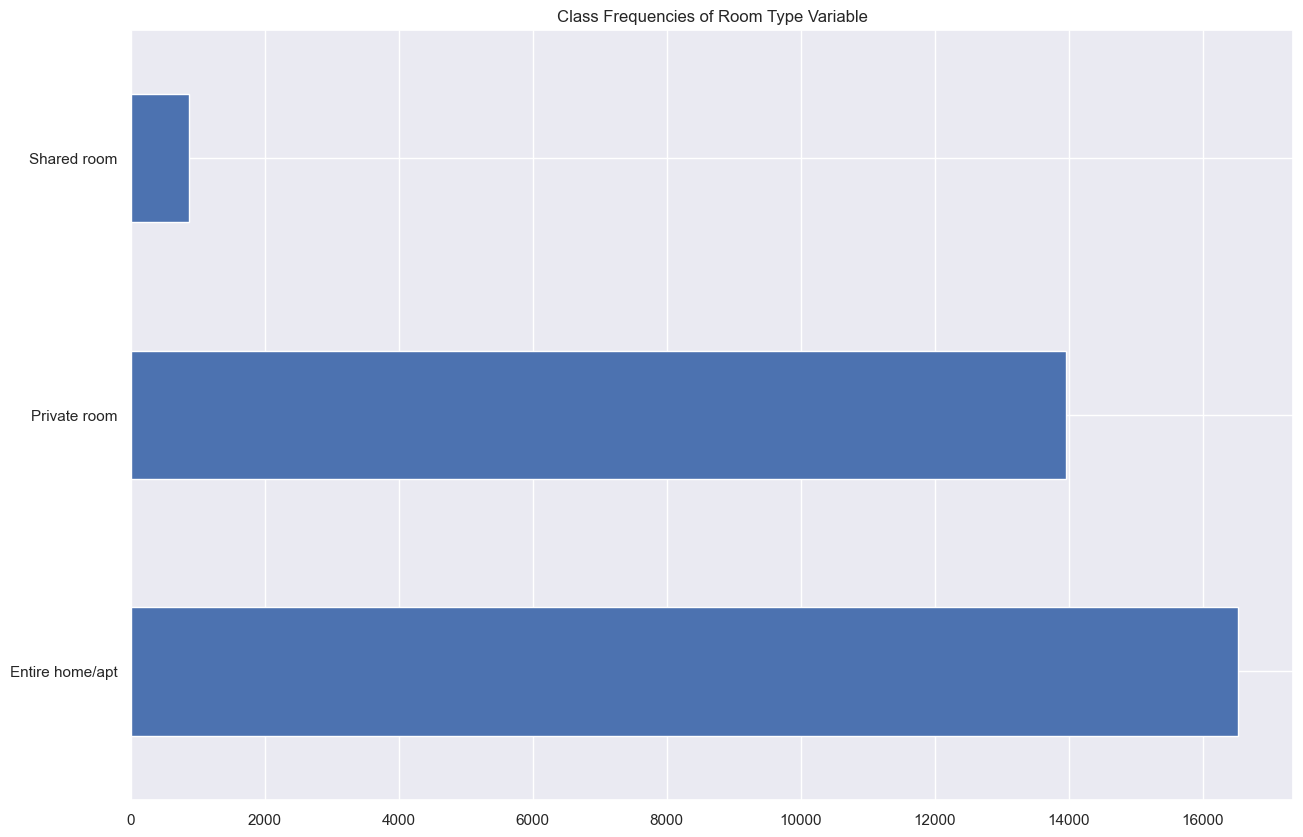

In [62]:
df["room_type"].value_counts().plot.barh().set_title("Class Frequencies of Room Type Variable")
plt.savefig("Plots/barh_room_type_value_counts.png")
plt.show()

C:\Users\sony\AppData\Local\Temp\ipykernel_13792\2565737424.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("room_type").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", figsize=(5,5))


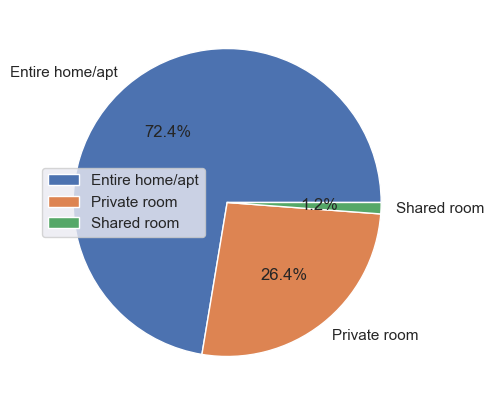

In [63]:
df.groupby("room_type").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", figsize=(5,5))
plt.savefig("Plots/pie_room_type_price.png")
plt.show()

C:\Users\sony\AppData\Local\Temp\ipykernel_13792\3927459925.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("neighbourhood_group").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))


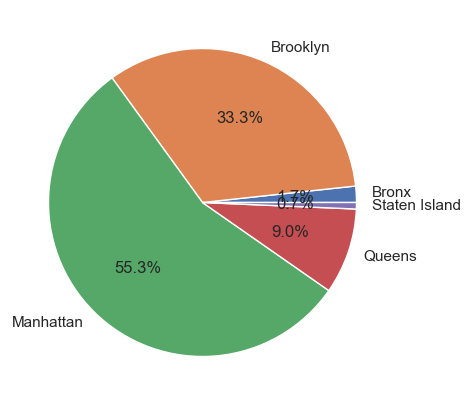

In [64]:
df.groupby("neighbourhood_group").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))
plt.savefig("Plots/pie_neighbourhood_group_price.png")
plt.show()

C:\Users\sony\AppData\Local\Temp\ipykernel_13792\3353872876.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("room_type").sum().plot.pie(y="number_of_reviews", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))


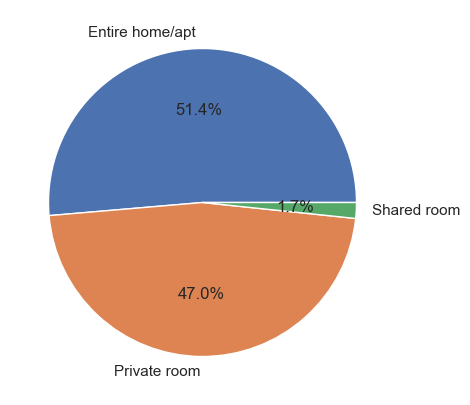

In [65]:
df.groupby("room_type").sum().plot.pie(y="number_of_reviews", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))
plt.savefig("Plots/pie_room_type_number_of_reviews.png")
plt.show()

C:\Users\sony\AppData\Local\Temp\ipykernel_13792\1915506937.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("neighbourhood_group").sum().plot.pie(y="number_of_reviews", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))


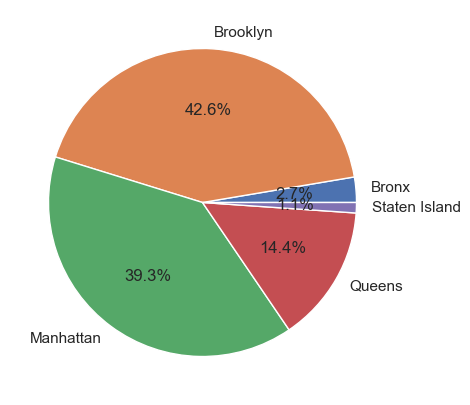

In [66]:
df.groupby("neighbourhood_group").sum().plot.pie(y="number_of_reviews", autopct="%.1f%%", ylabel="", legend=False, figsize=(5,5))
plt.savefig("Plots/pie_neighbourhood_group_number_of_reviews.png")
plt.show()

In [67]:
df.neighbourhood.unique()

['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'Murray Hill', ..., 'Willowbrook', 'New Dorp Beach', 'Bull's Head', 'Todt Hill', 'Jamaica Hills']
Length: 218
Categories (221, object): ['Allerton', 'Arden Heights', 'Arrochar', 'Arverne', ..., 'Woodhaven', 'Woodlawn', 'Woodrow', 'Woodside']

In [68]:
df['neighbourhood'].value_counts().head(10)

Bedford-Stuyvesant    2477
Williamsburg          2049
Harlem                1732
Bushwick              1446
Hell's Kitchen        1446
Upper East Side       1095
Upper West Side       1089
Midtown               1086
East Village           957
Crown Heights          911
Name: neighbourhood, dtype: int64

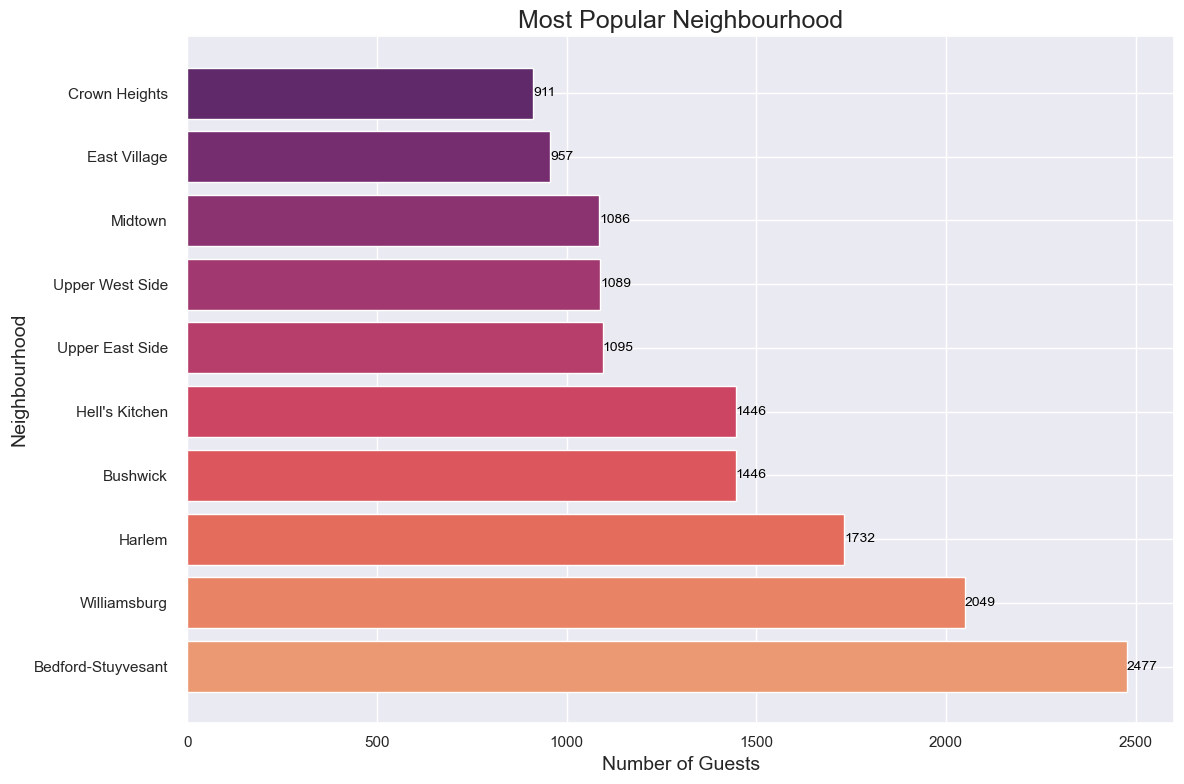

In [69]:
b = df['neighbourhood'].value_counts()[:10]

plt.figure(figsize=(12, 8))

colors = sns.color_palette('flare', len(b))

x = b.index
y = b.values

plt.barh(x, y, color=colors)

plt.title("Most Popular Neighbourhood", fontsize=18)
plt.xlabel("Number of Guests", fontsize=14)
plt.ylabel("Neighbourhood", fontsize=14)

for i, v in enumerate(y):
    plt.text(v, i, str(v), ha='left', va='center', fontsize=10, color='black')

plt.tick_params(axis='y', pad=8)

plt.tight_layout()
plt.savefig("Plots/barh_neighbourhood_10.png")
plt.show()

In [70]:
df.neighbourhood_group.unique()

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
Categories (5, object): ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

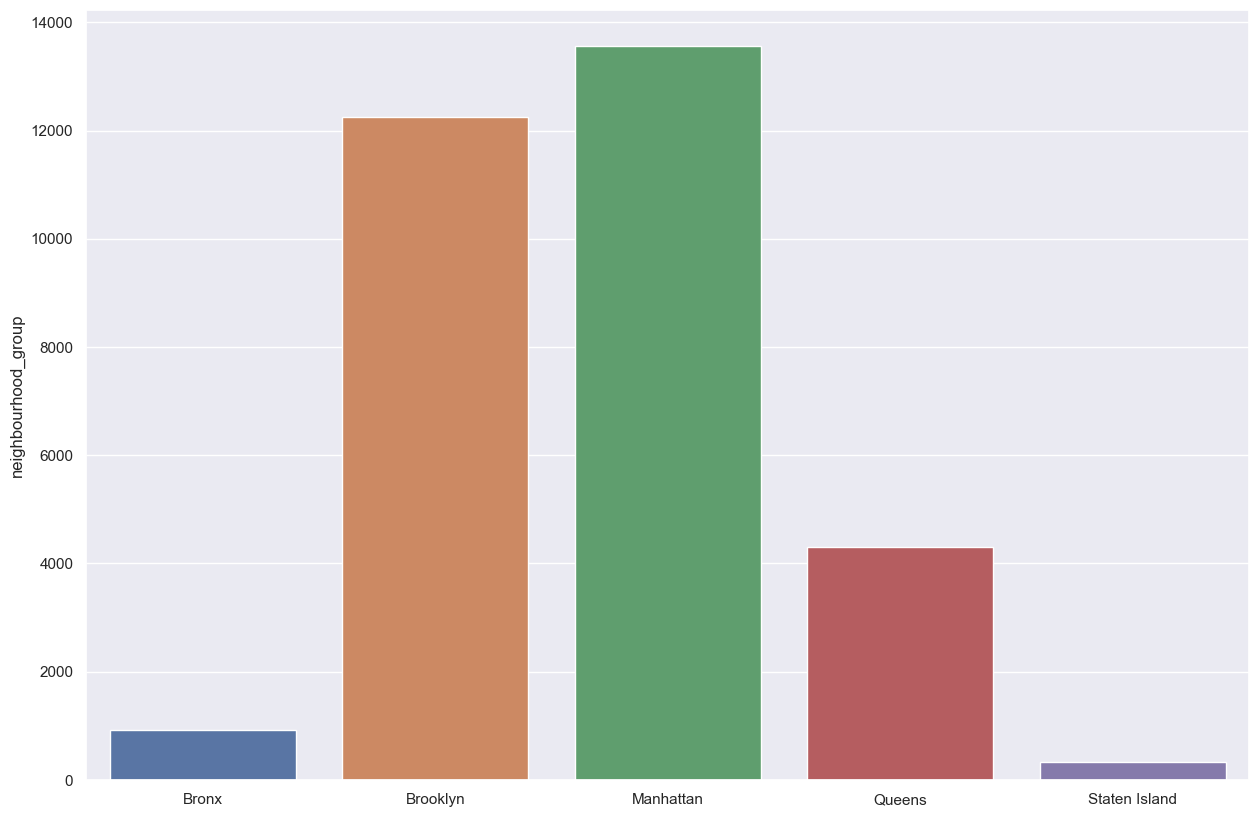

In [71]:
c = df['neighbourhood_group'].value_counts()
sns.barplot(x = c.index, y = c )
sns.set_style("whitegrid")
plt.savefig("Plots/bar_neighbourhood_group_value_counts.png")
plt.show()

In [72]:
df.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             85.575568
Brooklyn         124.305121
Manhattan        186.685316
Queens            95.955240
Staten Island     93.583809
Name: price, dtype: float64

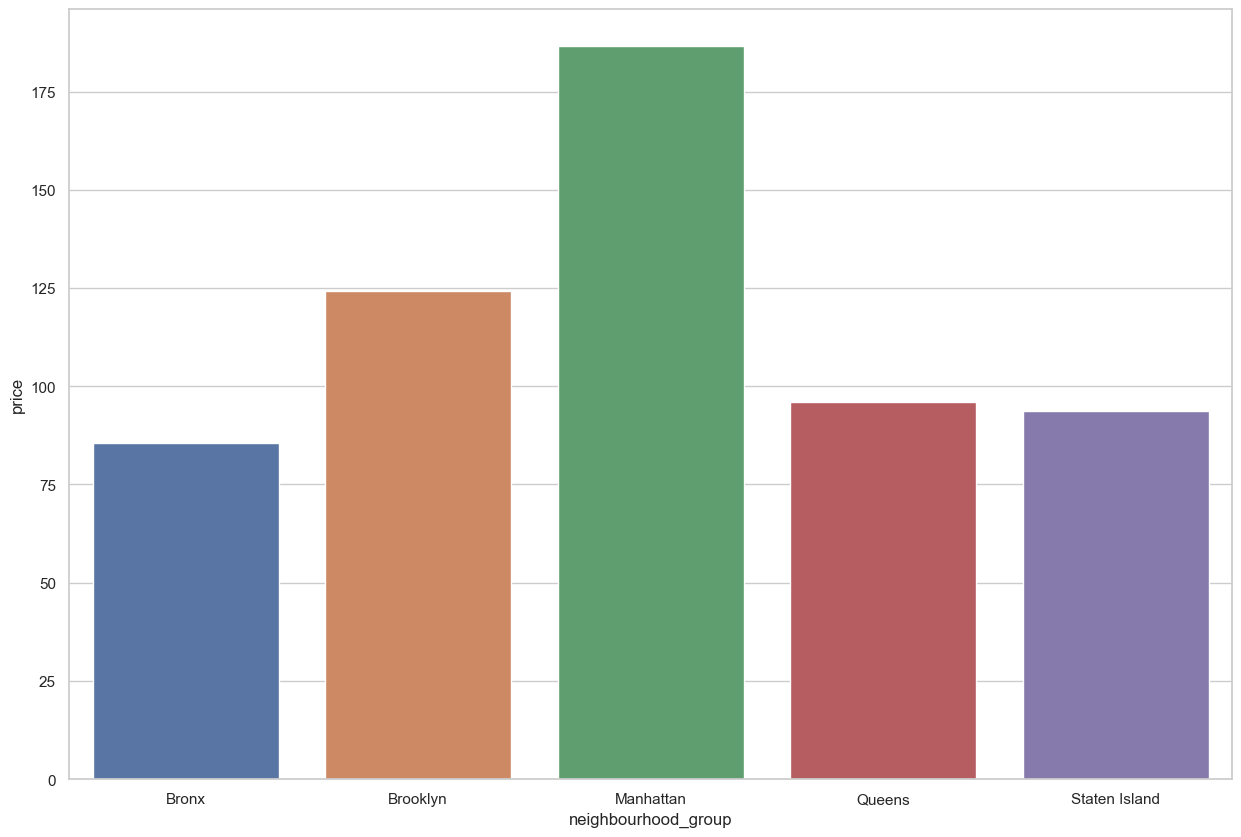

In [73]:
d = df.groupby('neighbourhood_group')['price'].mean()
sns.barplot(x = d.index,y = d)
sns.set_style("whitegrid")
plt.savefig("Plots/bar_neighbourhood_group_price.png")
plt.show()

In [74]:
df['room_type'].value_counts()

Entire home/apt    16523
Private room       13956
Shared room          861
Name: room_type, dtype: int64

<Figure size 1000x800 with 0 Axes>

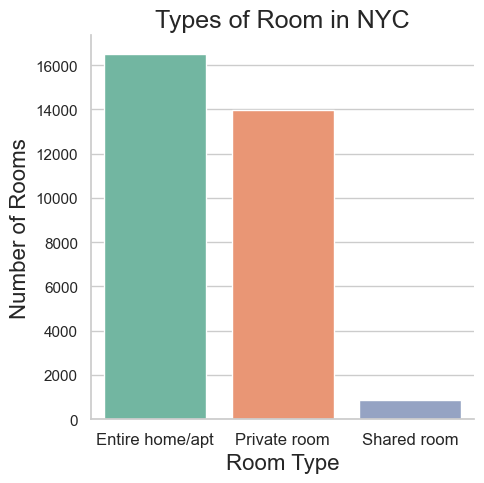

In [75]:
plt.figure(figsize=(10, 8))

colors = sns.color_palette('Set2')

cat_plot = sns.catplot(x="room_type", data=df, kind="count", height=5, palette=colors)

plt.title("Types of Room in NYC", fontsize=18)
plt.xlabel("Room Type", fontsize=16)
plt.ylabel("Number of Rooms", fontsize=16)

cat_plot.set_xticklabels(rotation=0)
cat_plot.set_ylabels("Number of Rooms")
plt.xticks(fontsize=12)

sns.set(font_scale=1)
plt.savefig("Plots/catplot_room_type_count.png")
plt.tight_layout()
plt.show()

In [76]:
df.groupby(['neighbourhood_group','room_type'])['price'].mean().sort_values(ascending=False)

neighbourhood_group  room_type      
Manhattan            Entire home/apt    232.255183
Brooklyn             Entire home/apt    175.124749
Queens               Entire home/apt    146.866100
Staten Island        Entire home/apt    131.817373
Bronx                Entire home/apt    128.974047
Manhattan            Private room       113.457417
                     Shared room         84.441791
Brooklyn             Private room        75.794910
Queens               Private room        68.464615
Bronx                Private room        62.489444
Staten Island        Shared room         62.125000
Bronx                Shared room         61.200000
Staten Island        Private room        61.070175
Queens               Shared room         48.305517
Brooklyn             Shared room         47.271242
Name: price, dtype: float64

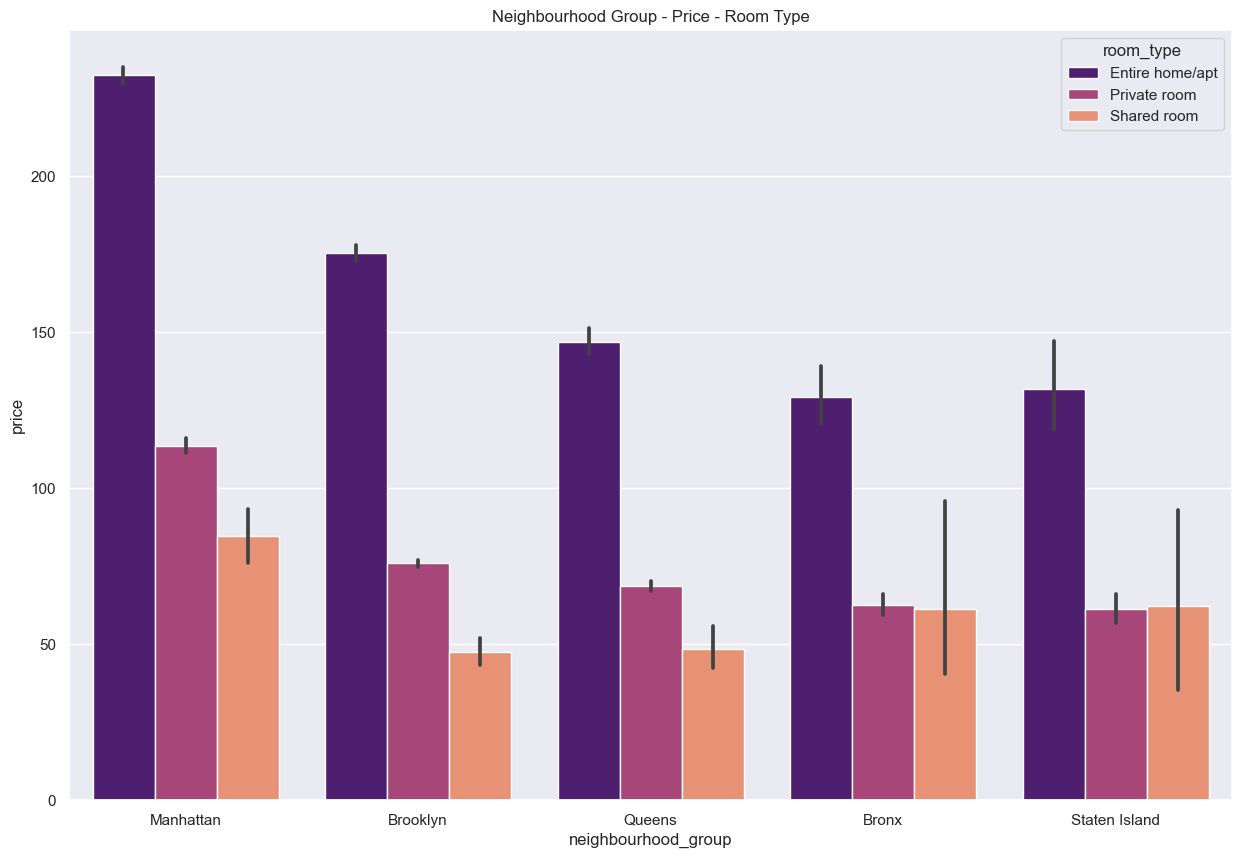

In [77]:
sns.barplot(x ='neighbourhood_group',y = 'price' ,hue = 'room_type' ,data = df ,palette ="magma", order = df.neighbourhood_group.value_counts().index)
plt.title("Neighbourhood Group - Price - Room Type")
plt.savefig("Plots/bar_neighbourhood_group_room_type_price.png")
plt.show()

<Figure size 800x500 with 0 Axes>

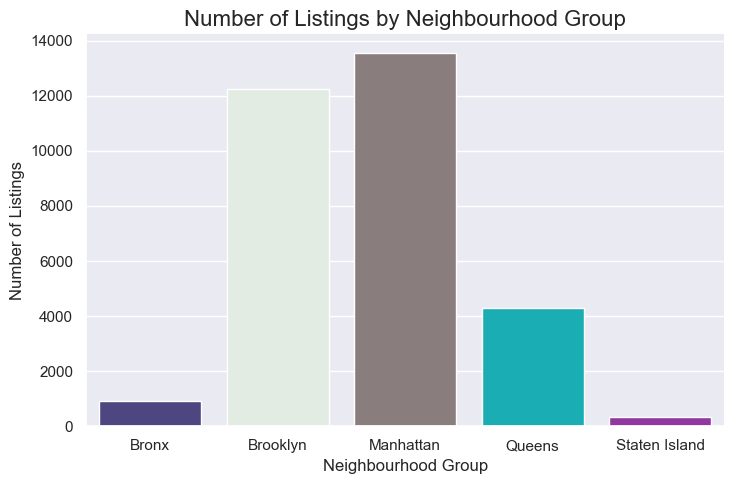

In [78]:
plt.figure(figsize=(8, 5))

colors = ['#473C8B', '#E0EEE0', '#8B7D7B',  '#00C5CD', '#9C27B0']

cat_plot = sns.catplot(x="neighbourhood_group", data=df, kind="count", palette=colors, height=5, aspect=1.5)

cat_plot.ax.set_title("Number of Listings by Neighbourhood Group", fontsize=16)
cat_plot.set(xlabel="Neighbourhood Group", ylabel="Number of Listings")

sns.despine()
cat_plot.set_xticklabels(ha='center')
plt.tight_layout()
plt.savefig("Plots/catplot_neighbourhood_group_count.png")
plt.show()

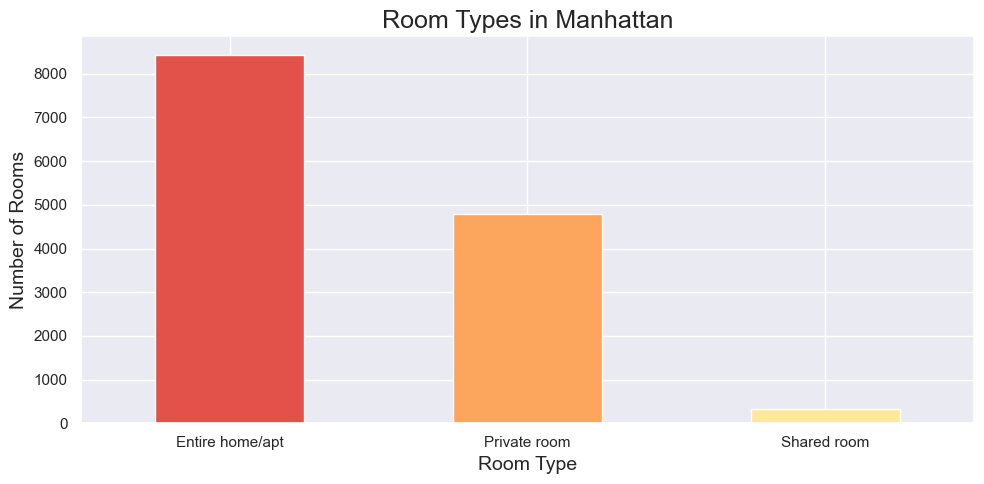

In [79]:
df_1 = df[df['neighbourhood_group'] == 'Manhattan']
e = df_1['room_type'].value_counts()

plt.figure(figsize=(10, 5))

colors = sns.color_palette('Spectral')

e.plot(kind='bar', color=colors)

plt.title('Room Types in Manhattan', fontsize=18)
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Number of Rooms', fontsize=14)

plt.xticks(rotation=0)
plt.tick_params(axis='x', which='both', bottom=False)
plt.savefig("Plots/bar_neighbourhood_group_Manhattan_room_type.png")
plt.tight_layout()
plt.show()

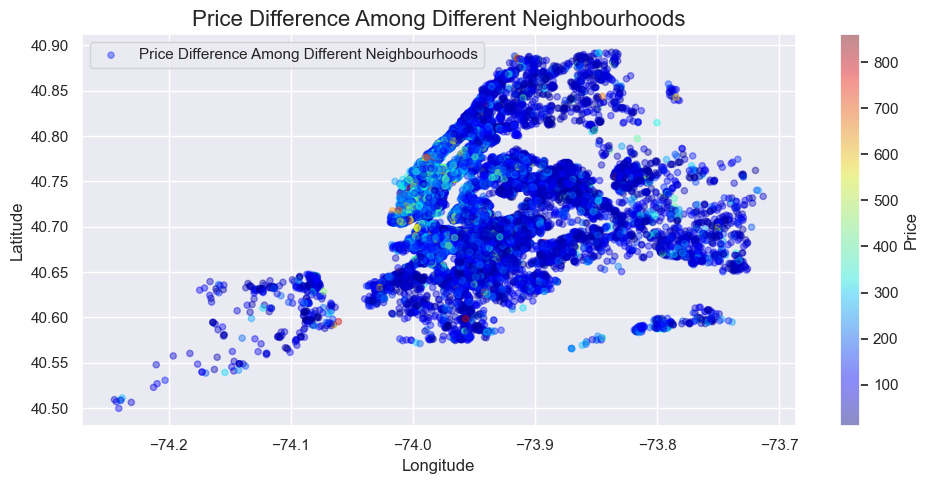

In [80]:
f = df.plot(kind='scatter', x='longitude', y='latitude', label='Price Difference Among Different Neighbourhoods', c='price',
                cmap='jet', colorbar=True, alpha=0.4, figsize=(10, 5))

plt.title('Price Difference Among Different Neighbourhoods', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

colorbar = f.collections[0].colorbar
colorbar.set_label('Price', fontsize=12)

plt.legend()
plt.tight_layout()
plt.savefig("Plots/scatterplot_longitude_latitude_price.png")
plt.show()

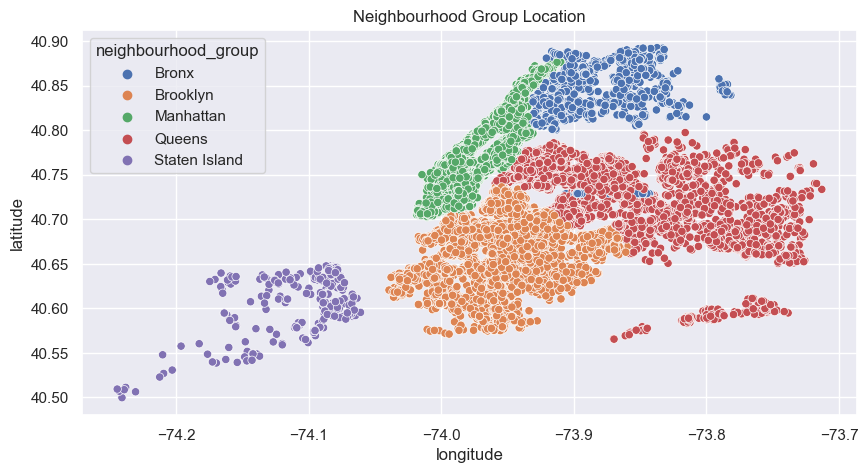

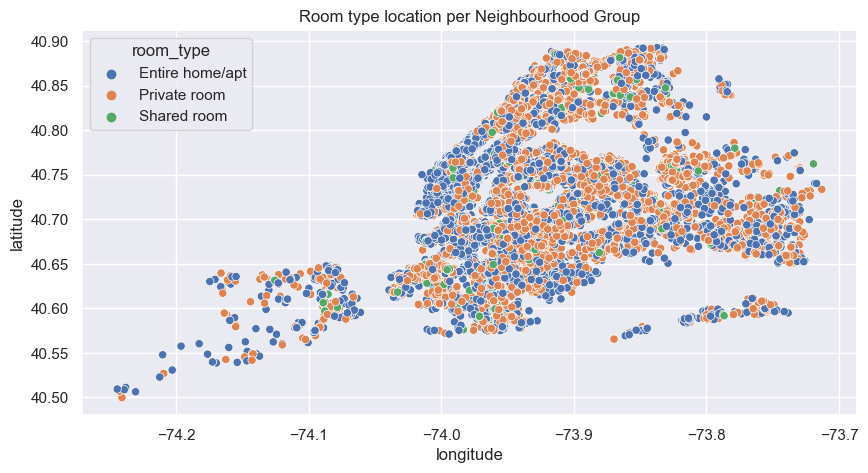

In [81]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group')
plt.title("Neighbourhood Group Location")
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='room_type')
plt.title('Room type location per Neighbourhood Group')
plt.savefig("Plots/scatterplot_longitude_latitude_neighbourhood_group&room_type.png")
plt.show()

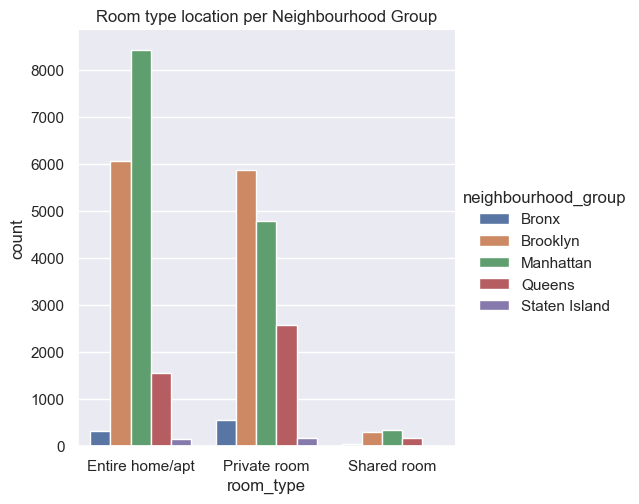

In [82]:
sns.catplot(x='room_type', kind="count", hue="neighbourhood_group", data=df);
plt.title('Room type location per Neighbourhood Group')
plt.ioff()
plt.savefig("Plots/catplot_room_type_neighbourhood_group.png")

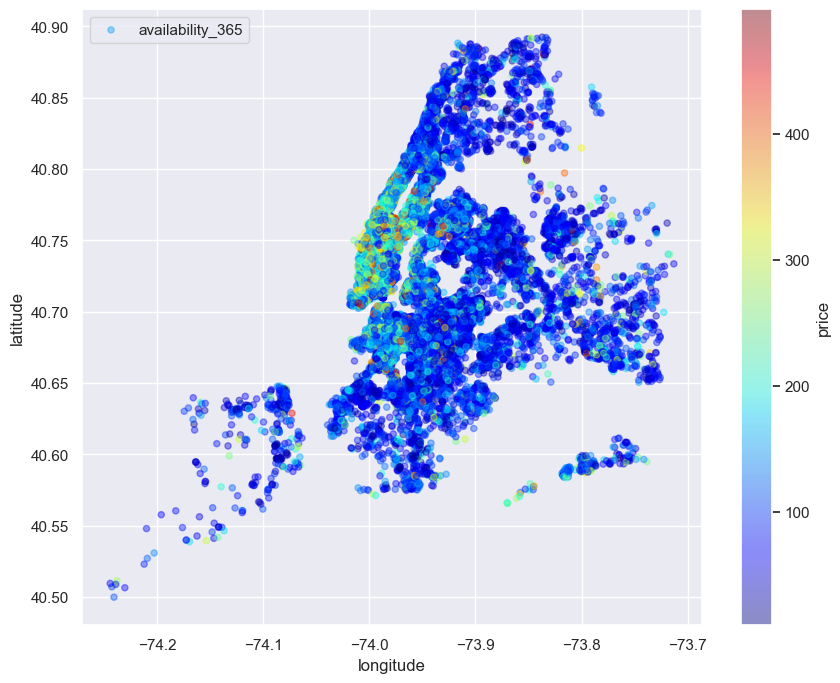

In [83]:
g = df[df.price < 500].plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
g.legend()
plt.savefig("Plots/scatterplot_longitude_latitude_availability_365_price.png")
plt.show()

In [84]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [85]:
df.pivot_table(values=["minimum_nights", "number_of_reviews", "price","availability_365","calculated_host_listings_count"],
               columns="room_type",
               aggfunc=np.mean)

room_type                       Entire home/apt  Private room  Shared room
availability_365                     171.945954    177.765262   217.286876
calculated_host_listings_count         5.443981      4.038396     5.559814
minimum_nights                         9.998608      5.866007     5.815331
number_of_reviews                     31.037826     33.618085    19.185830
price                                200.359229     86.641611    62.875138

In [86]:
df.pivot_table(values=["minimum_nights", "number_of_reviews", "price","availability_365","calculated_host_listings_count"],
               columns="neighbourhood_group",
               aggfunc=np.mean)

neighbourhood_group                  Bronx    Brooklyn   Manhattan  \
availability_365                197.936473  164.294031  178.833100   
calculated_host_listings_count    2.361446    2.865046    6.884641   
minimum_nights                    4.860898    6.698293   10.511400   
number_of_reviews                29.054765   34.704254   28.942891   
price                            85.575568  124.305121  186.685316   

neighbourhood_group                 Queens  Staten Island  
availability_365                190.411778     225.015106  
calculated_host_listings_count    4.596136       2.419940  
minimum_nights                    5.015130       4.839879  
number_of_reviews                33.485335      32.824773  
price                            95.955240      93.583809